<a href="https://colab.research.google.com/github/Dennis-Kiarie/KNN-NAIVE-BAYES-CLASSIFIERS/blob/main/Moringa_Data_Science_Core_W9_Independent_Project_2021_Dennis_Kiarie_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Defining the question**

**a. Specifying the question**

Build a model to determine whether or not person's sailing details, indicate whether a Titanic passenger survived the disaster or not.

**b. Defining the Metric for success**



*  Achieve an accuracy above 85%
*  Achieve F1 score above 85%



**c. Understanding the context**

RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking at the time one of the deadliest of a single ship and the deadliest peacetime sinking of a superliner or cruise ship to date.
For more information see https://en.wikipedia.org/wiki/Sinking_of_the_Titanic 

**d. Recording Experimental Design**

CRISPS-DM methodology will be applied. Below steps will be undertaken to create the classifier:

*  Business understanding; understanding the background about the RMS Titanic.
*  Data understanding.
*  Data preparation
*  Exploratory Data Analysis.
*  Feature Engineering.
*  Data Modelling
*  Model Evaluation












**e. Data Relevance**

We will be using data extracted from two csv files i.e 

*   train.csv (data for a subset of the passengers including outcomes (survived or perished))
*   test.csv (data for a subset of passengers without outcomes)

The dataset to use for this project can be found by following this link:


*   Dataset Source: [Train Dataset Source:

 https://archive.org/download/train5_202002/train%20%285%29.csv

*  Test Dataset Source:

 https://archive.org/download/test1_202002/test%20%281%29.csv]




Below is the Data description:


*   Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
*   Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
*   Name - Name
*   Sex - Sex
*   Age - Age
*   Sibsp - Number of Siblings/Spouses Aboard
*   Parch - Number of Parents/Children Aboard
*   Ticket - Ticket Number
*   Fare - Passenger Fare
*   Cabin - Cabin
*   Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

The Tatanic onboard sailing passengers dataset has 891 records and 12 columns

#2. Reading the data

In [ ]:
# Let first import the necessary libraries
#---
# Data Manipulation Libraries
import pandas as pd
import numpy as np
import math
from scipy import stats

## Suppress scientific notation
#---
#
pd.set_option('display.float_format', lambda x: '%.3f' % x)

##Visualization Libraries
#---
#
import matplotlib.pyplot as plt
%matplotlib inline

## Graphics in retina format are more sharp and legible
#---
#
%config InlineBackend.figure_format='retina'
import seaborn as sns

## Modelling Libraries
#---
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, roc_curve, auc, f1_score, recall_score, precision_score, classification_report,confusion_matrix

## Hide warnings related to numpy
#---
# 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
##Increase rows and columns visible on notebook
#---
#
pd.set_option('display.max_rows' , 5000)
pd.set_option('display.max_colum' , 50)

In [ ]:
##Import the Dataset
#---
#
passenger = pd.read_csv('/content/train (5).csv', sep=',\s+', delimiter=',', encoding="utf-8", skipinitialspace=True)

#preview the dataset
#---
#
passenger.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


#3. Checking the data

In [ ]:
## Previewing of the dataset: Observation of snapshot of dataset
#use the sample function that will provide us with a better outlook of our dataset
#---
#
passenger.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
804,805,1,3,"Hedman, Mr. Oskar Arvid",male,27.000,0,0,347089,6.975,NaN,S
586,587,0,2,"Jarvis, Mr. John Denzil",male,47.000,0,0,237565,15.000,NaN,S
350,351,0,3,"Odahl, Mr. Nils Martin",male,23.000,0,0,7267,9.225,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.000,0,1,11767,83.158,C50,C
500,501,0,3,"Calic, Mr. Petar",male,17.000,0,0,315086,8.662,NaN,S
588,589,0,3,"Gilinski, Mr. Eliezer",male,22.000,0,0,14973,8.050,NaN,S
491,492,0,3,"Windelov, Mr. Einar",male,21.000,0,0,SOTON/OQ 3101317,7.250,NaN,S
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,nan,1,0,19996,52.000,C126,S
409,410,0,3,"Lefebre, Miss. Ida",female,nan,3,1,4133,25.467,NaN,S
447,448,1,1,"Seward, Mr. Frederic Kimber",male,34.000,0,0,113794,26.550,NaN,S


In [ ]:
## Determining the shape of our new dataset
#---
#
passenger.shape

(891, 12)

There are 891 records and 12 columns.

In [ ]:
##Previewing our columns
#--
#
passenger.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
## Checking whether each column has an appropriate datatype
#---
#
print("Datatypes for sailing dataset: ")
print(passenger.dtypes)
print("*****************")

Datatypes for sailing dataset: 
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
*****************


In [ ]:
##Previewing the top of sailing dataset
#---
#
passenger.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [ ]:
##previewing the bottom of sailing dataset
#---
#
passenger.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000,0,0,370376,7.750,NaN,Q


# 4. Tidying the dataset

In [ ]:
## We check how many columns have missing values
#---
#
def show_missing(dataframe_name):
  missing_all= dataframe_name.columns[passenger.isnull().any()].tolist()
  more_than_zero=dataframe_name[missing_all].isnull().sum().sort_values(ascending=False)
  percentage=more_than_zero/dataframe_name.shape[0]*100
  return more_than_zero,percentage 

In [ ]:
## Let's see the missing values
#--
#
show_missing(passenger)

(Cabin       687
 Age         177
 Embarked      2
 dtype: int64, Cabin      77.104
 Age        19.865
 Embarked    0.224
 dtype: float64)

There are several missing values across most of the features going from 0.224% to  77.104%.

The Cabin has the highest percentage of 77.104%.missing records.This percentage is too high hence column will be dropped.

Age has 0.224% missing values.Should this column be dropped or imputation to be done? Age being one of the important demographic factor of a pasenger its too important of a column to drop as it would mean losing over 25% of the values. Therefore values will be dropped during data cleaning stage rather than being dropped.

Also, the missing values of column embarked will be imputed in data cleaning.

In [ ]:
##check for duplicates
#---
#
#check for duplicates
passenger.duplicated().sum()

0

There no duplicates so we continue with data cleaning

Conversion from Object to Numeric data types

Two approaches to be employed:

a)Casting to be done to columns which have numeric or float values.



b)Encoding done by manual replacement of columns which have binary values

In [ ]:
## In Sex column, 1 implies that a passenger is a male and 0 is a female
#---
#
passenger['Sex'].replace(['male', 'female'], [1,0], inplace = True)


c) Encoding done by manual replacement of columns which have ordinar variable

In [ ]:
##In Embarked column, 1 is Cherbourg, 2 is Queenstown and 3 is Southampton
#---
#
passenger['Embarked'].replace(['C', 'Q' ,'S'], [1,2,3], inplace=True)

Treatment of missing values. 

Possible actions are:

a) Discard instances of missing features or whole features

b)Impute missing value using a measure of central tendancy. e.g using mean, median, mode or a specific value.

c)Impute missing values using other features of regression and classification depending on the datatype.

In [ ]:
## Drop the feature cabin as it has over 85% missing values
#---
#
passenger.drop('Cabin', inplace=True, axis=1)

In [ ]:
##Approach imputing with mean of a whole group
#---
#
def fillmissing(dataframe_name, column_name, approach):
  if approach =='mean':
    dataframe_name[column_name]= dataframe_name[column_name].fillna((dataframe_name[column_name].mean()))
  elif approach=='mode':
    dataframe_name[column_name]= dataframe_name[column_name].fillna((dataframe_name[column_name].mode()))
  elif approach=='median':
    dataframe_name[column_name]= dataframe_name[column_name].fillna((dataframe_name[column_name].median()))

In [ ]:
##imputing missing values . we impute with mean because Age column is a continous variable and has no outliers.
#---
#
fillmissing(passenger, 'Age', 'mean') 

## impute with  mode because Embarked column is an ordinal variable
#---
#
passenger['Embarked'].fillna(passenger['Embarked'].mode()[0], inplace=True) 


In [ ]:
## Rechecking missing values
#---
#
show_missing(passenger)


(Series([], dtype: float64), Series([], dtype: float64))

In [ ]:
##converting variables from float to int 
#---
#
passenger['Age'] = passenger['Age'].astype(int)
passenger['Fare'] = passenger['Fare'].astype(int)

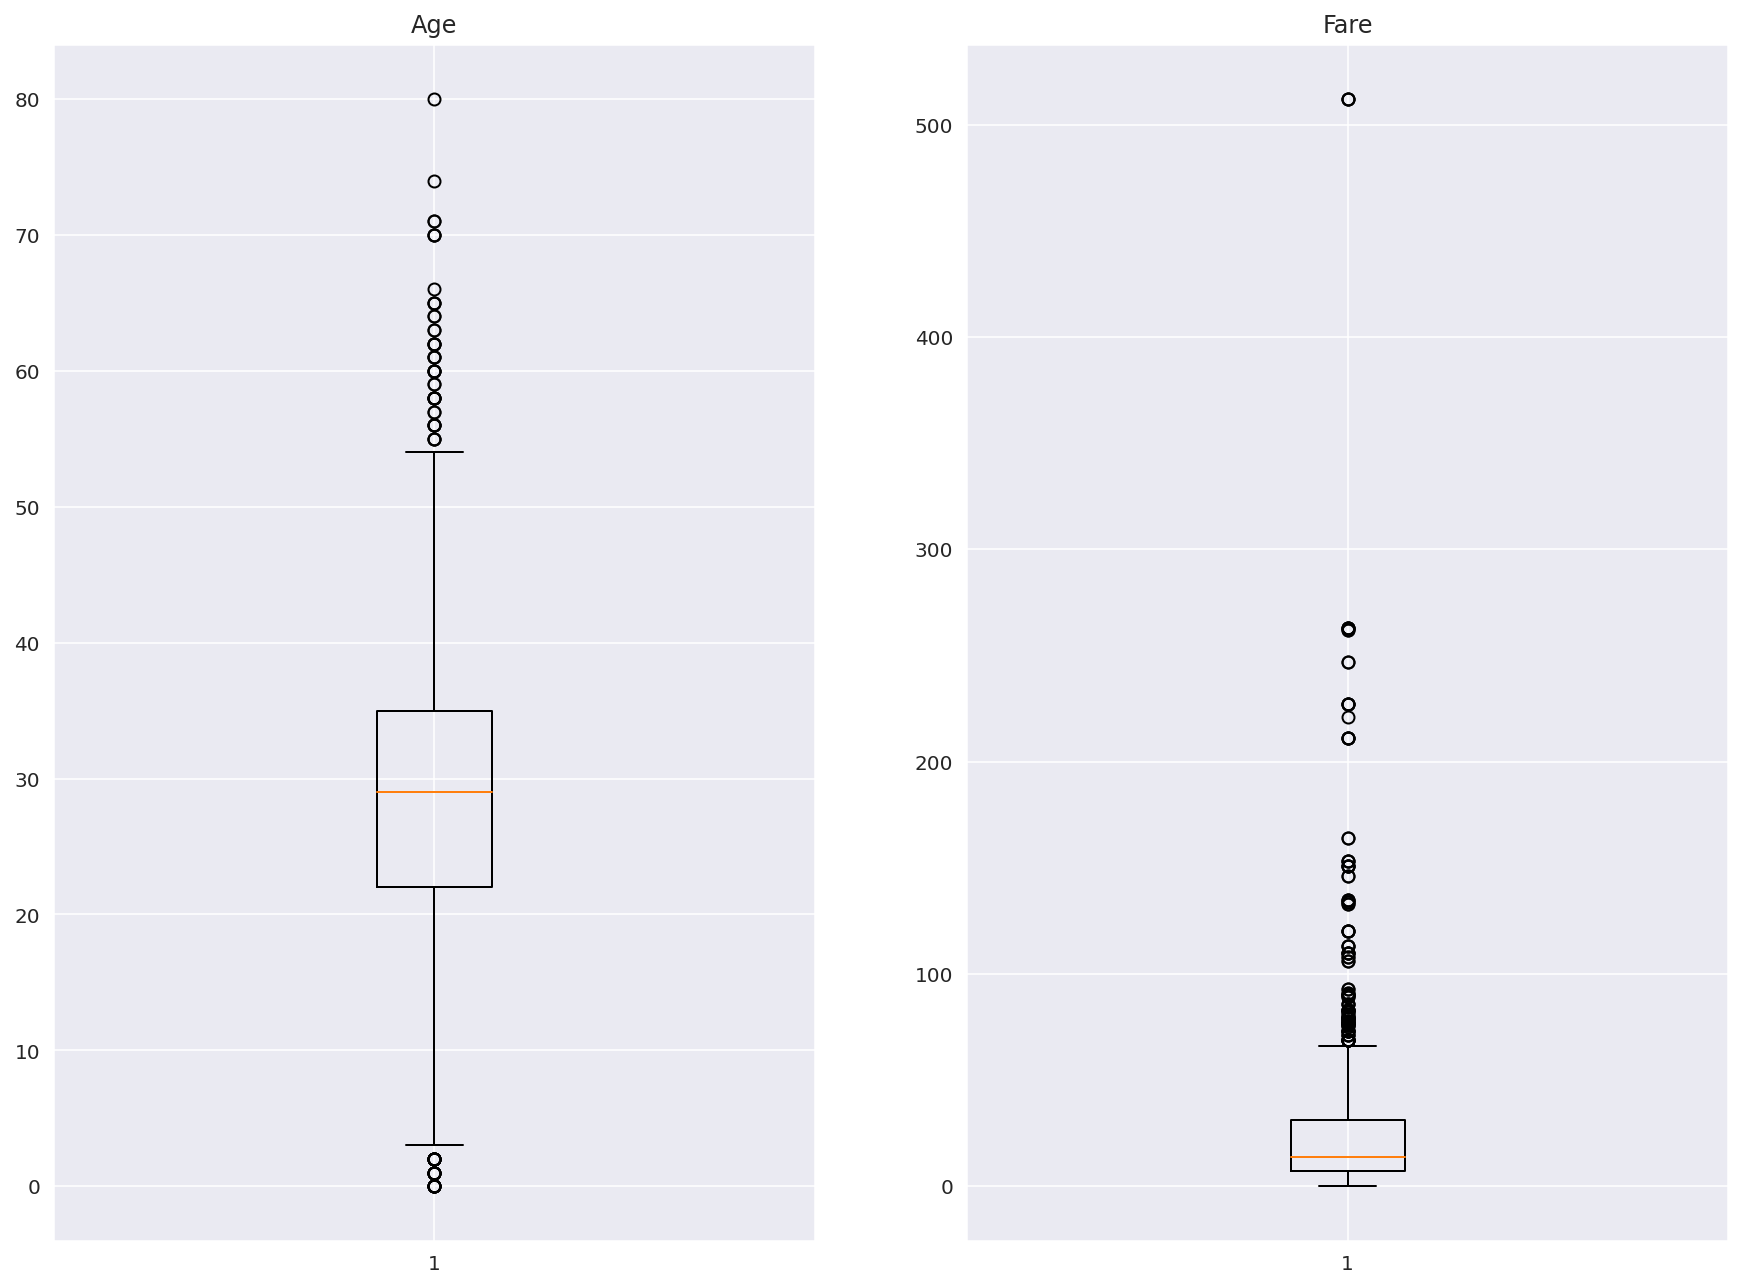

In [ ]:
##Age and Fare columns are a continuous variable. We check for outliers in both Age and Fare columns .
#--
#
column_num={'Age':1 , 'Fare':2}

plt.figure(figsize=(15,11))

##we make a boxplot for each numerical column
#---
#
for variable,i in column_num.items():
  plt.subplot(1,2,i)
  plt.boxplot(passenger[variable])
  plt.title(variable)

plt.show()

In [ ]:
##checking for anomalies
#---
#

##Checking outliers
#---
# 

## quantiles
#---
#
Q1 = passenger.quantile(0.25)
Q3 = passenger.quantile(0.75)
IQR = Q3 - Q1

## Removing outliers based on the IQR range 
#---
# 
df= passenger[~((passenger < (Q1 - 1.5 * IQR)) | (passenger > (Q3 + 1.5 * IQR))).any(axis=1)]

## Printing the shape of our new dataset
#---
# 
print('The shape of our new dataset is :',df.shape)

## Printing the shape of our old dataset
#---
#
print('The shape of our old dataset is :',passenger.shape)

The shape of our new dataset is : (579, 11)
The shape of our old dataset is : (891, 11)


In [ ]:
## we drop unnecessary column
#--
#
df = df.drop(['PassengerId'], axis=1)

In [ ]:
##Check for unique values in each column
#---
#
for col in df.columns.to_list():
  print(f'{col} column unique values: \n')
  print(df[col].unique(), end='\n')
  print('**********')
  print('\n')

Survived column unique values: 

[0 1]
**********


Pclass column unique values: 

[3 1 2]
**********


Name column unique values: 

['Braund, Mr. Owen Harris' 'Heikkinen, Miss. Laina'
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)' 'Allen, Mr. William Henry'
 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Saundercock, Mr. William Henry'
 'Vestrom, Miss. Hulda Amanda Adolfina' 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Emir, Mr. Farred Chehab' 'O\'Dwyer, Miss. Ellen "Nellie"'
 'Todoroff, Mr. Lalio' 'Uruchurtu, Don. Manuel E'
 'Glynn, Miss. Mary Agatha' 'Holverson, Mr. Alexander Oskar'
 'Mamee, Mr. Hanna' 'Cann, Mr. Ernest Charles'
 'Vander Planke, Miss. Augusta Maria' 'Nicola-Yarred, Miss. Jamila'
 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)'
 'Turpin, Mrs. Willi

In [ ]:
##Checking datatypes to validate that no column has object datatypes
#---
#
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  579 non-null    int64  
 1   Pclass    579 non-null    int64  
 2   Name      579 non-null    object 
 3   Sex       579 non-null    int64  
 4   Age       579 non-null    int64  
 5   SibSp     579 non-null    int64  
 6   Parch     579 non-null    int64  
 7   Ticket    579 non-null    object 
 8   Fare      579 non-null    int64  
 9   Embarked  579 non-null    float64
dtypes: float64(1), int64(7), object(2)
memory usage: 49.8+ KB


**5.External Data source validation**

#6. Exploratory Data Analysis

**a. Univariate Analysis**

In [ ]:
##plotting a frequency distribution of variable values
#---
#

# Frequency distribution of values in variables
for var in df.columns:
    
    print(df[var].value_counts())

0    405
1    174
Name: Survived, dtype: int64
3    373
2    121
1     85
Name: Pclass, dtype: int64
Johnson, Mr. Alfred                                                    1
Lievens, Mr. Rene Aime                                                 1
Peuchen, Major. Arthur Godfrey                                         1
Johnson, Mr. William Cahoone Jr                                        1
Staneff, Mr. Ivan                                                      1
Vander Planke, Mr. Leo Edmondus                                        1
Waelens, Mr. Achille                                                   1
Watt, Mrs. James (Elizabeth "Bessie" Inglis Milne)                     1
Smith, Miss. Marion Elsie                                              1
Keane, Mr. Andrew "Andy"                                               1
Johannesen-Bratthammer, Mr. Bernt                                      1
Nosworthy, Mr. Richard Cater                                           1
Sirayanian, Mr. Orsen  

In [ ]:
##we get proprotion of servivors
#---
#
df['Survived'].value_counts(normalize=True)*100

0   69.948
1   30.052
Name: Survived, dtype: float64

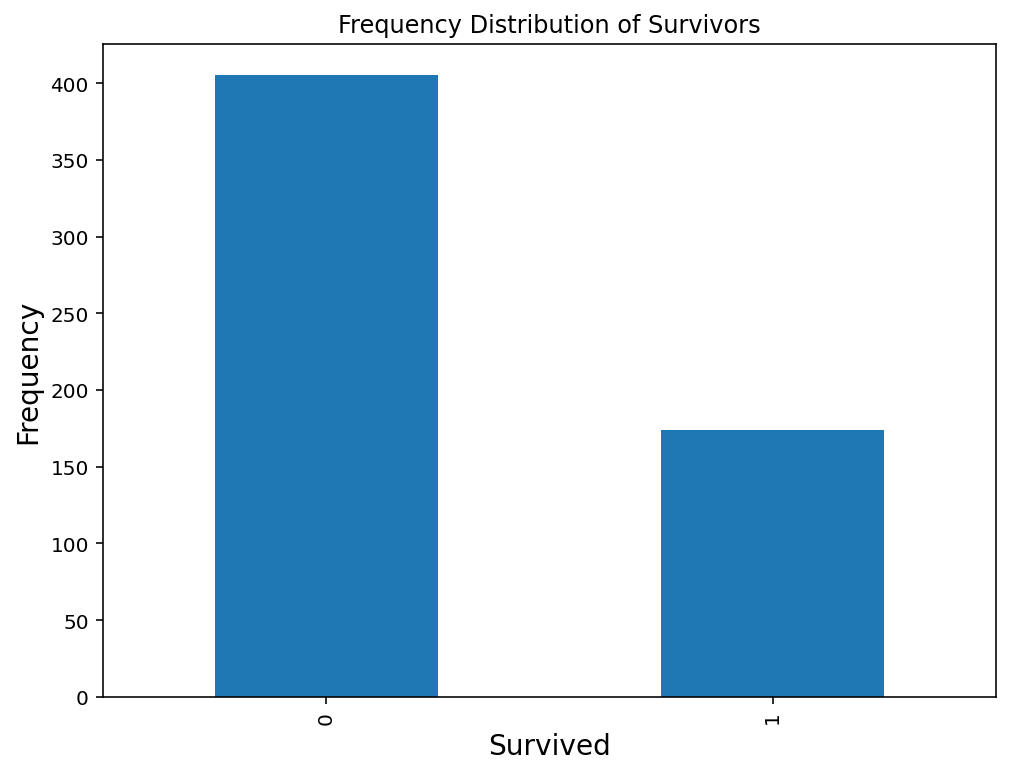

In [ ]:
##Checking Survived type value counts
#---
#
fig, ax = plt.subplots(figsize = (8,6))

df['Survived'].value_counts().plot.bar(title = 'Frequency Distribution of Survivors')
plt.xlabel('Survived', color = 'black', fontsize = 14)
plt.ylabel('Frequency', color = 'black', fontsize = 14)
plt.show()

## 1 implies yes and 0 implies no

**Observation**

Dataset has almost twice the number of passegers who perished than survivors.

In [ ]:
##we get proprotion of sex
#---
#
df['Sex'].value_counts(normalize=True)*100

1   75.130
0   24.870
Name: Sex, dtype: float64

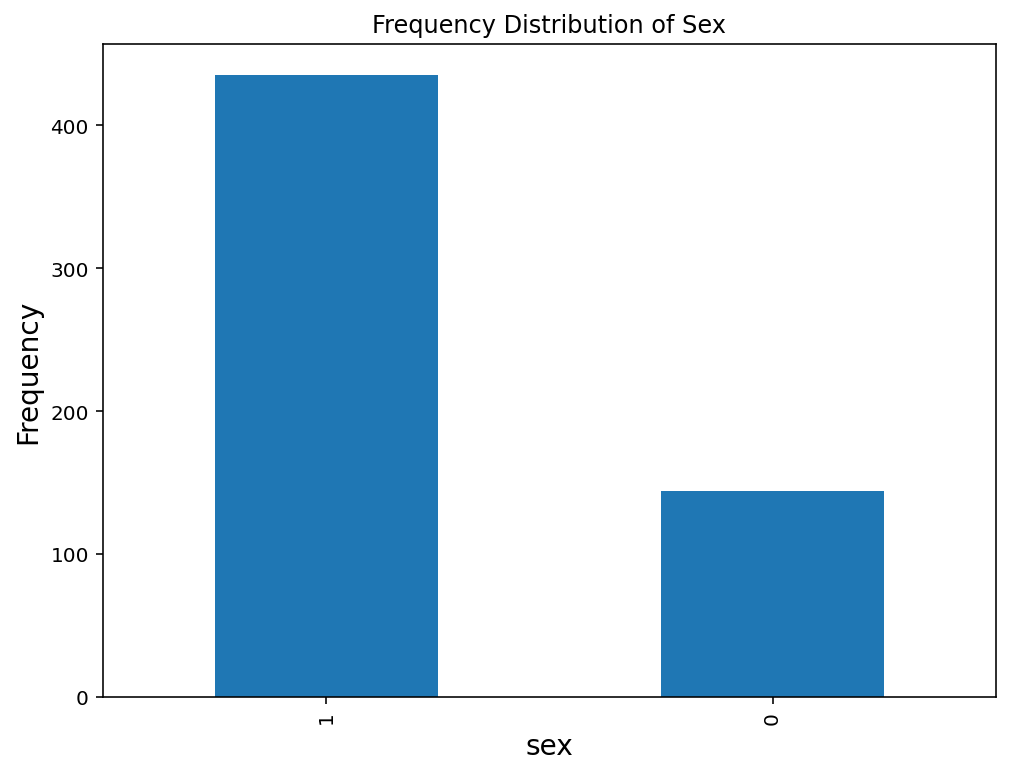

In [ ]:
##Checking sex type value counts
#---
#
fig,
fig, ax = plt.subplots(figsize = (8,6))

df['Sex'].value_counts().plot.bar(title = 'Frequency Distribution of Sex')
plt.xlabel('sex', color = 'black', fontsize = 14)
plt.ylabel('Frequency', color = 'black', fontsize = 14)
plt.show()

**Observation**

There were alot more men on board than women i.e 75.130% for men and 24.870% for women.

In [ ]:
##we get proprotion of Pclass
#---
#
df['Pclass'].value_counts(normalize=True)*100

3   64.421
2   20.898
1   14.680
Name: Pclass, dtype: float64

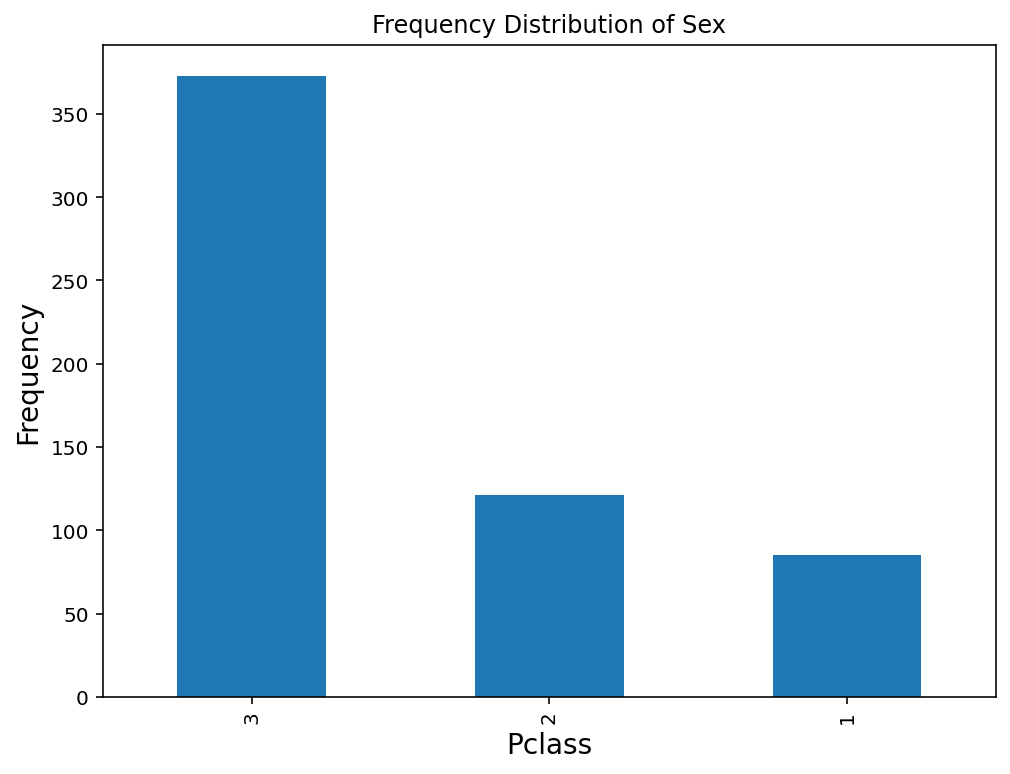

In [ ]:
##Checking Pclass type value counts
#---
#
fig,
fig, ax = plt.subplots(figsize = (8,6))

df['Pclass'].value_counts().plot.bar(title = 'Frequency Distribution of Sex')
plt.xlabel('Pclass', color = 'black', fontsize = 14)
plt.ylabel('Frequency', color = 'black', fontsize = 14)
plt.show()

#1 represent first class, 2 represents second class and 3 represents third class.

**Observation**

There were alot more Third class as compared to the others.

In [ ]:
##create a list of numerical column
#---
#
numeric=['Age' , 'Fare']

In [ ]:
##we calculate the mean of the numeric features
#---
#
for col in numeric:
  print(df[[col]].mean())

Age   29.535
dtype: float64
Fare   14.682
dtype: float64


In [ ]:
## Determining the mode of each of the numeric features
#---
#
for col in numeric:
  print(df[[col]].mode())

   Age
0   29
   Fare
0     7


In [ ]:
##Identifying the median
#---
# 
for col in numeric:
  print(df[[col]].median())

Age   29.000
dtype: float64
Fare   8.000
dtype: float64


In [ ]:
##Describe numerical variables
#---
#
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,579.000,579.000,579.000,579.000,579.000,579.000,579.000,579.000
mean,0.301,2.497,0.751,29.535,0.202,0.000,14.682,2.613
std,0.459,0.738,0.433,8.513,0.447,0.000,12.996,0.717
min,0.000,1.000,0.000,5.000,0.000,0.000,0.000,1.000
25%,0.000,2.000,1.000,24.000,0.000,0.000,7.000,3.000
50%,0.000,3.000,1.000,29.000,0.000,0.000,8.000,3.000
75%,1.000,3.000,1.000,32.000,0.000,0.000,16.000,3.000
max,1.000,3.000,1.000,54.000,2.000,0.000,66.000,3.000


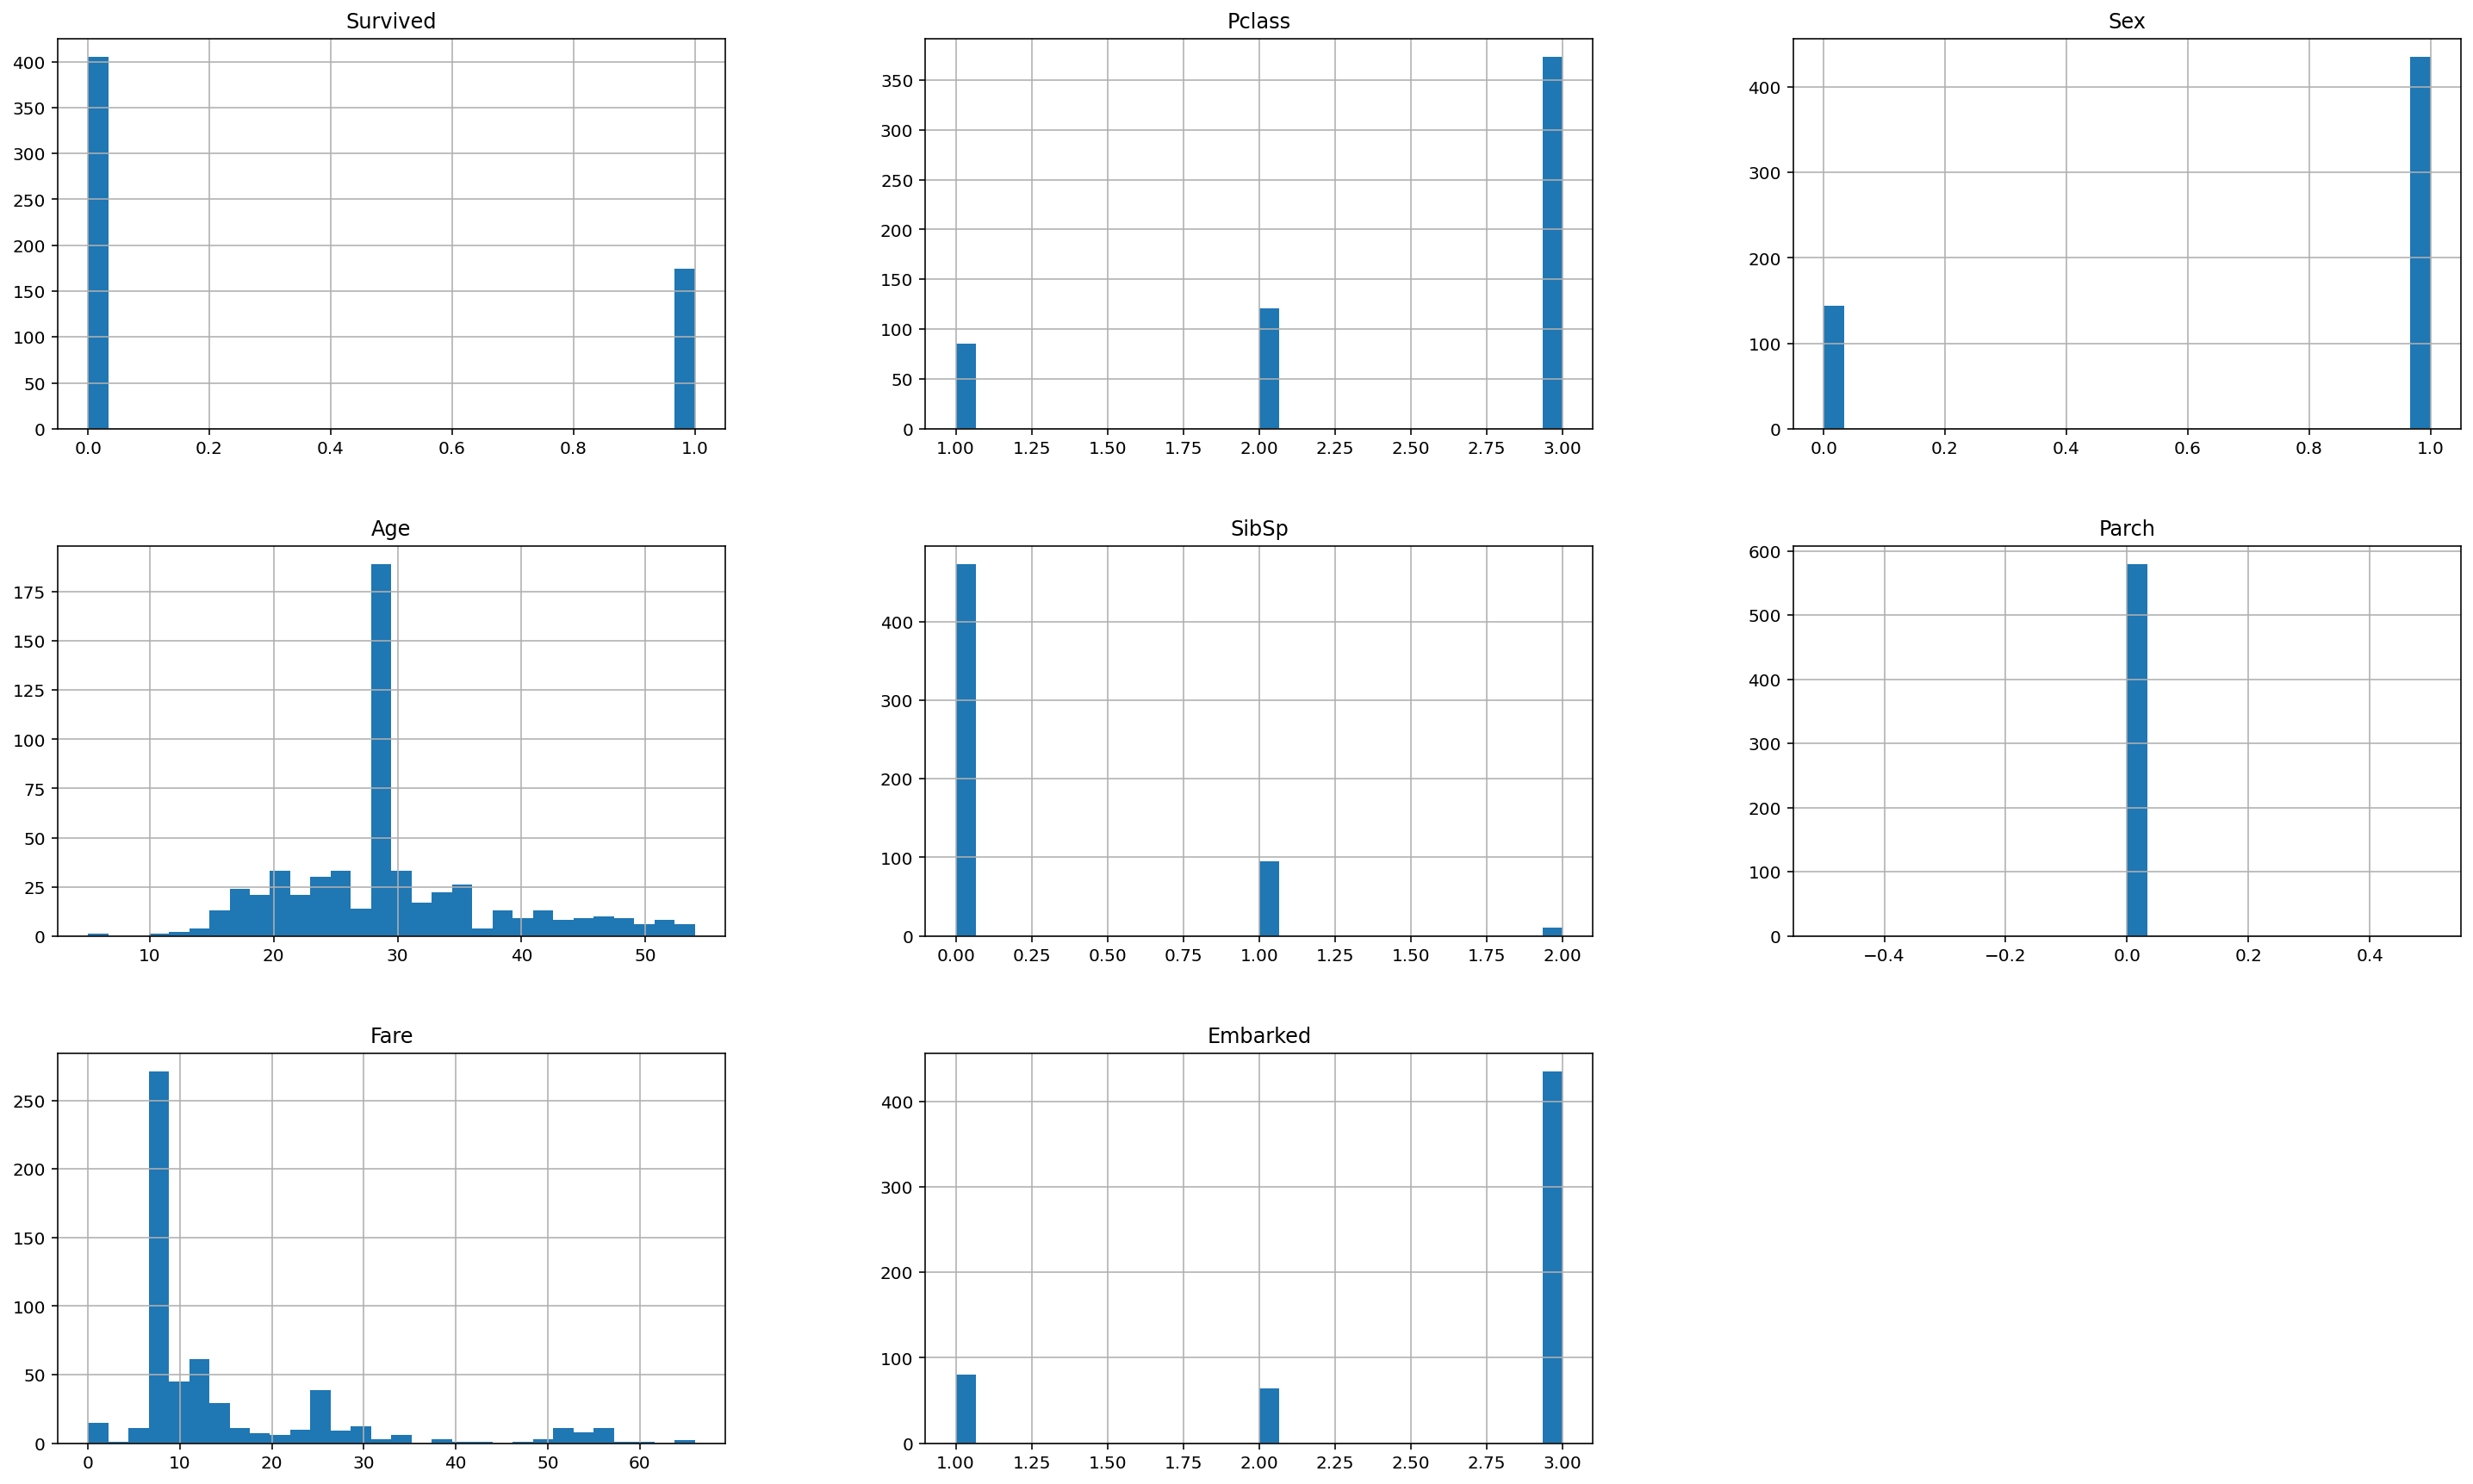

In [ ]:
##Plotting a distribution plot
#---
#
df.hist(bins=30, figsize=[25,15])
plt.show()

**0bservation**


*   Survived distribution: Dataset has almost double the number of passengers who perished than survivors. 
*   Sex: There are more men onboard than female.
*   Pclass: Thirdclass has a large number of passengers onboard compared to other classes.
*   Age is distributed across all groups from 5 to 56 years.


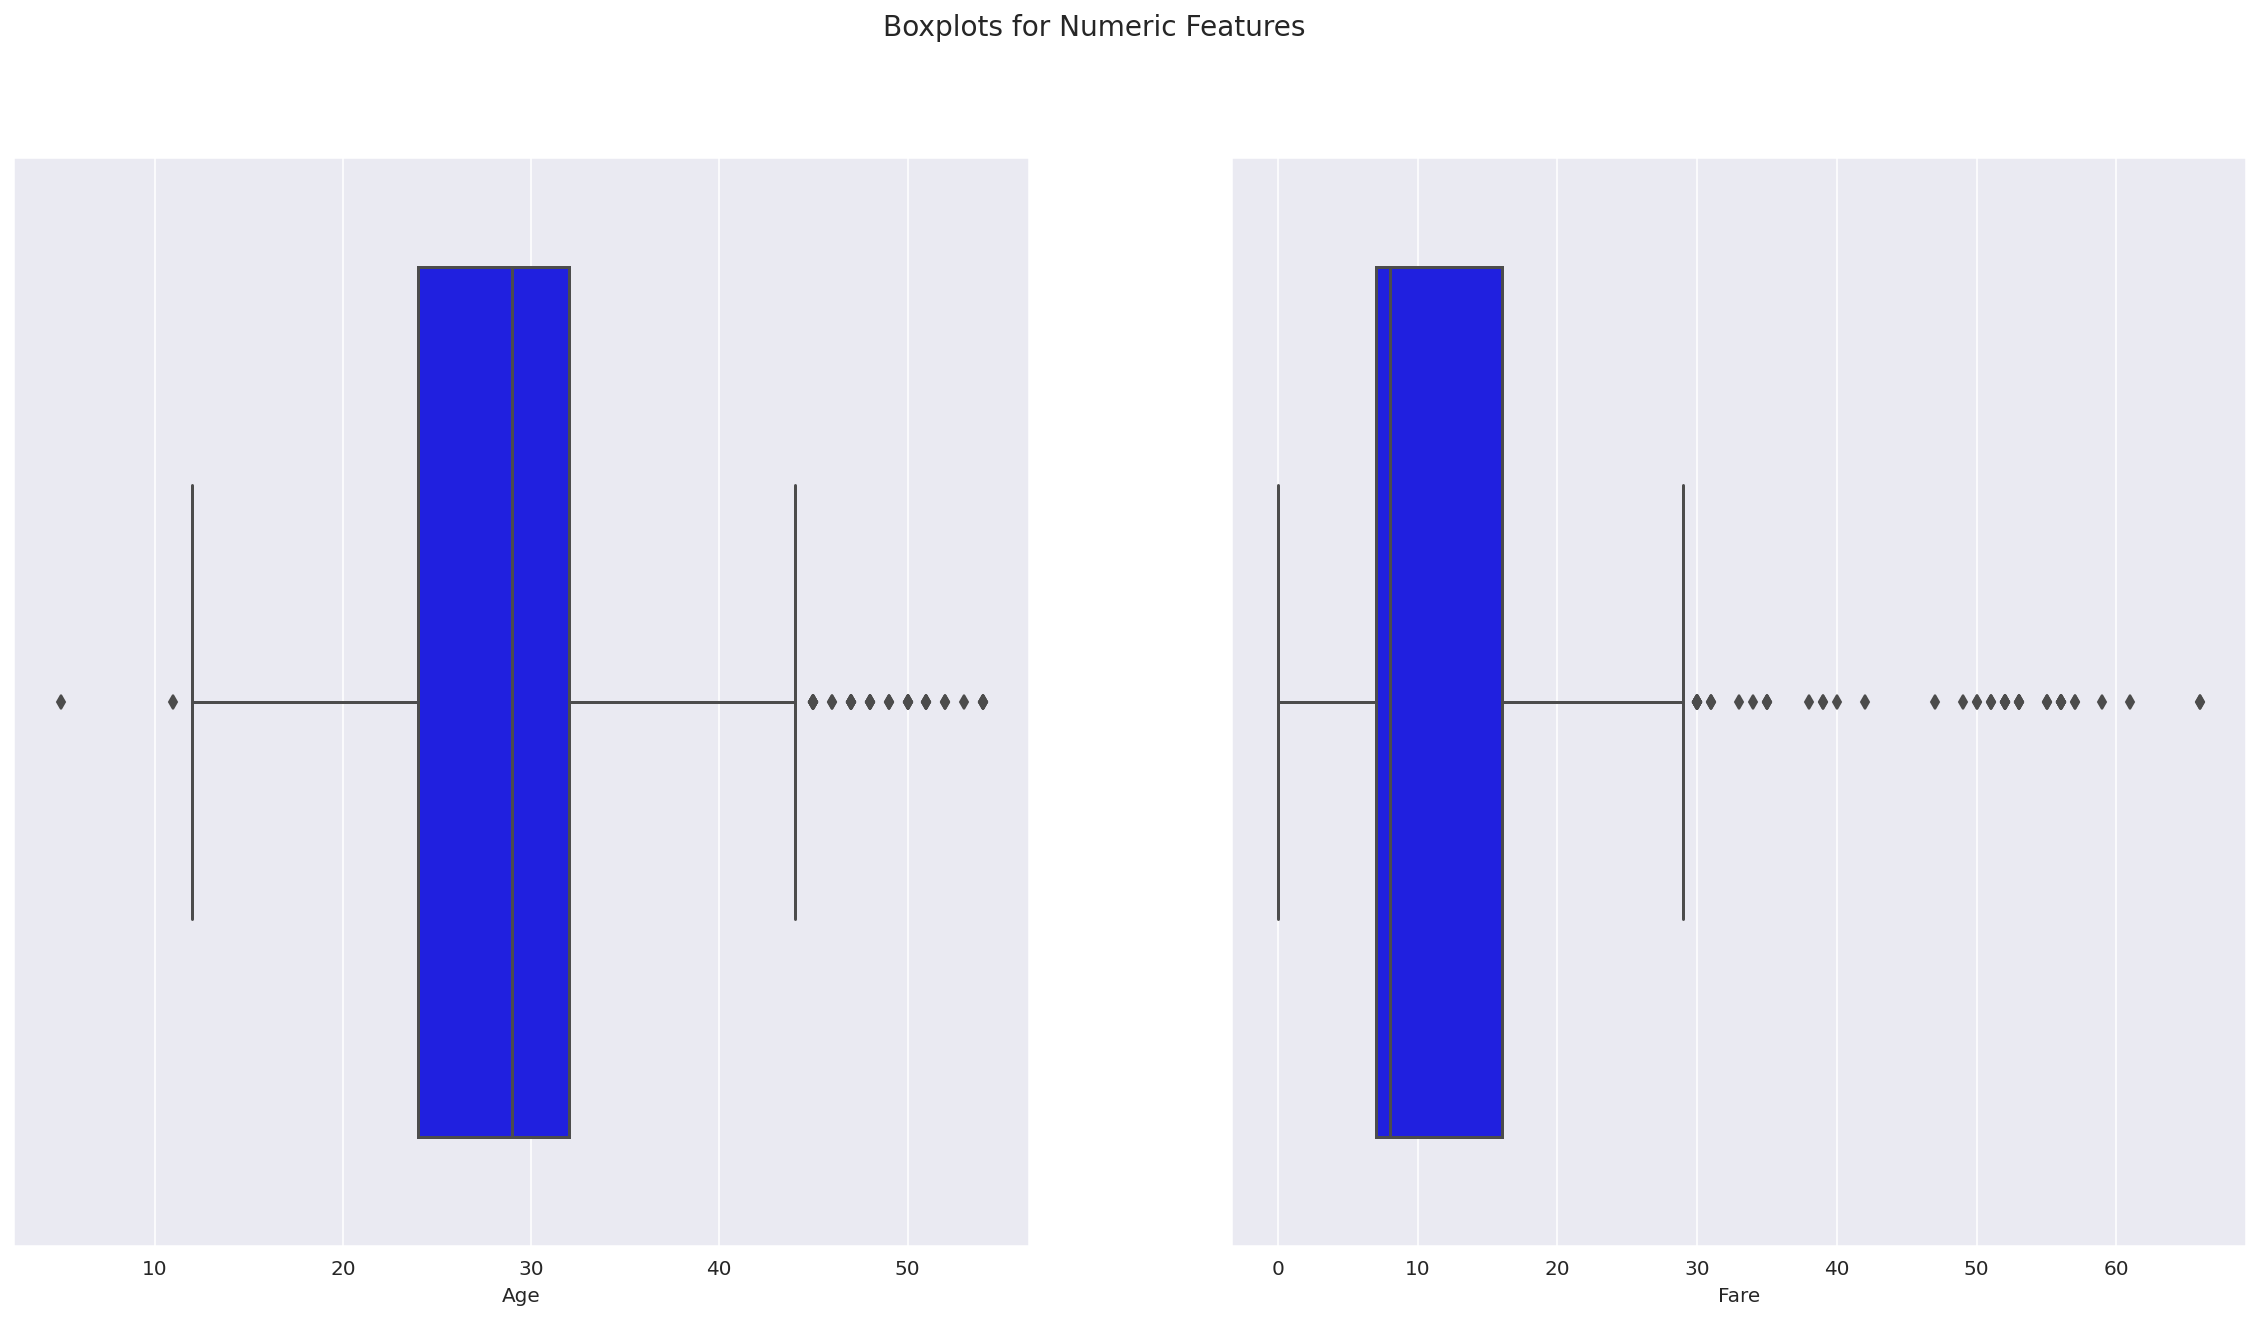

In [ ]:
##plotting for non binary column
#---
#

sns.set_style('darkgrid')

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10))
for ax, data, name in zip(axes.flatten(), df, numeric):
  sns.boxplot(df[name], color = 'blue', ax = ax)
  plt.suptitle('Boxplots for Numeric Features', fontsize = 14)
  plt.subplots_adjust()

**Observation**

Outliers noticed across all measurements for continuous variables.
Actions:Sailing passengers measurements outliers noted requires further research or domain analysis to confirm if its an actual measurement or incorrect entry or even callibration error. If so that would be enough justification to drop the outliers.

For now the outliers will not be dropped .However, during modelling a test case for score without outliers in 2 features above will be done to confirm the impact of outliers on success outcome.

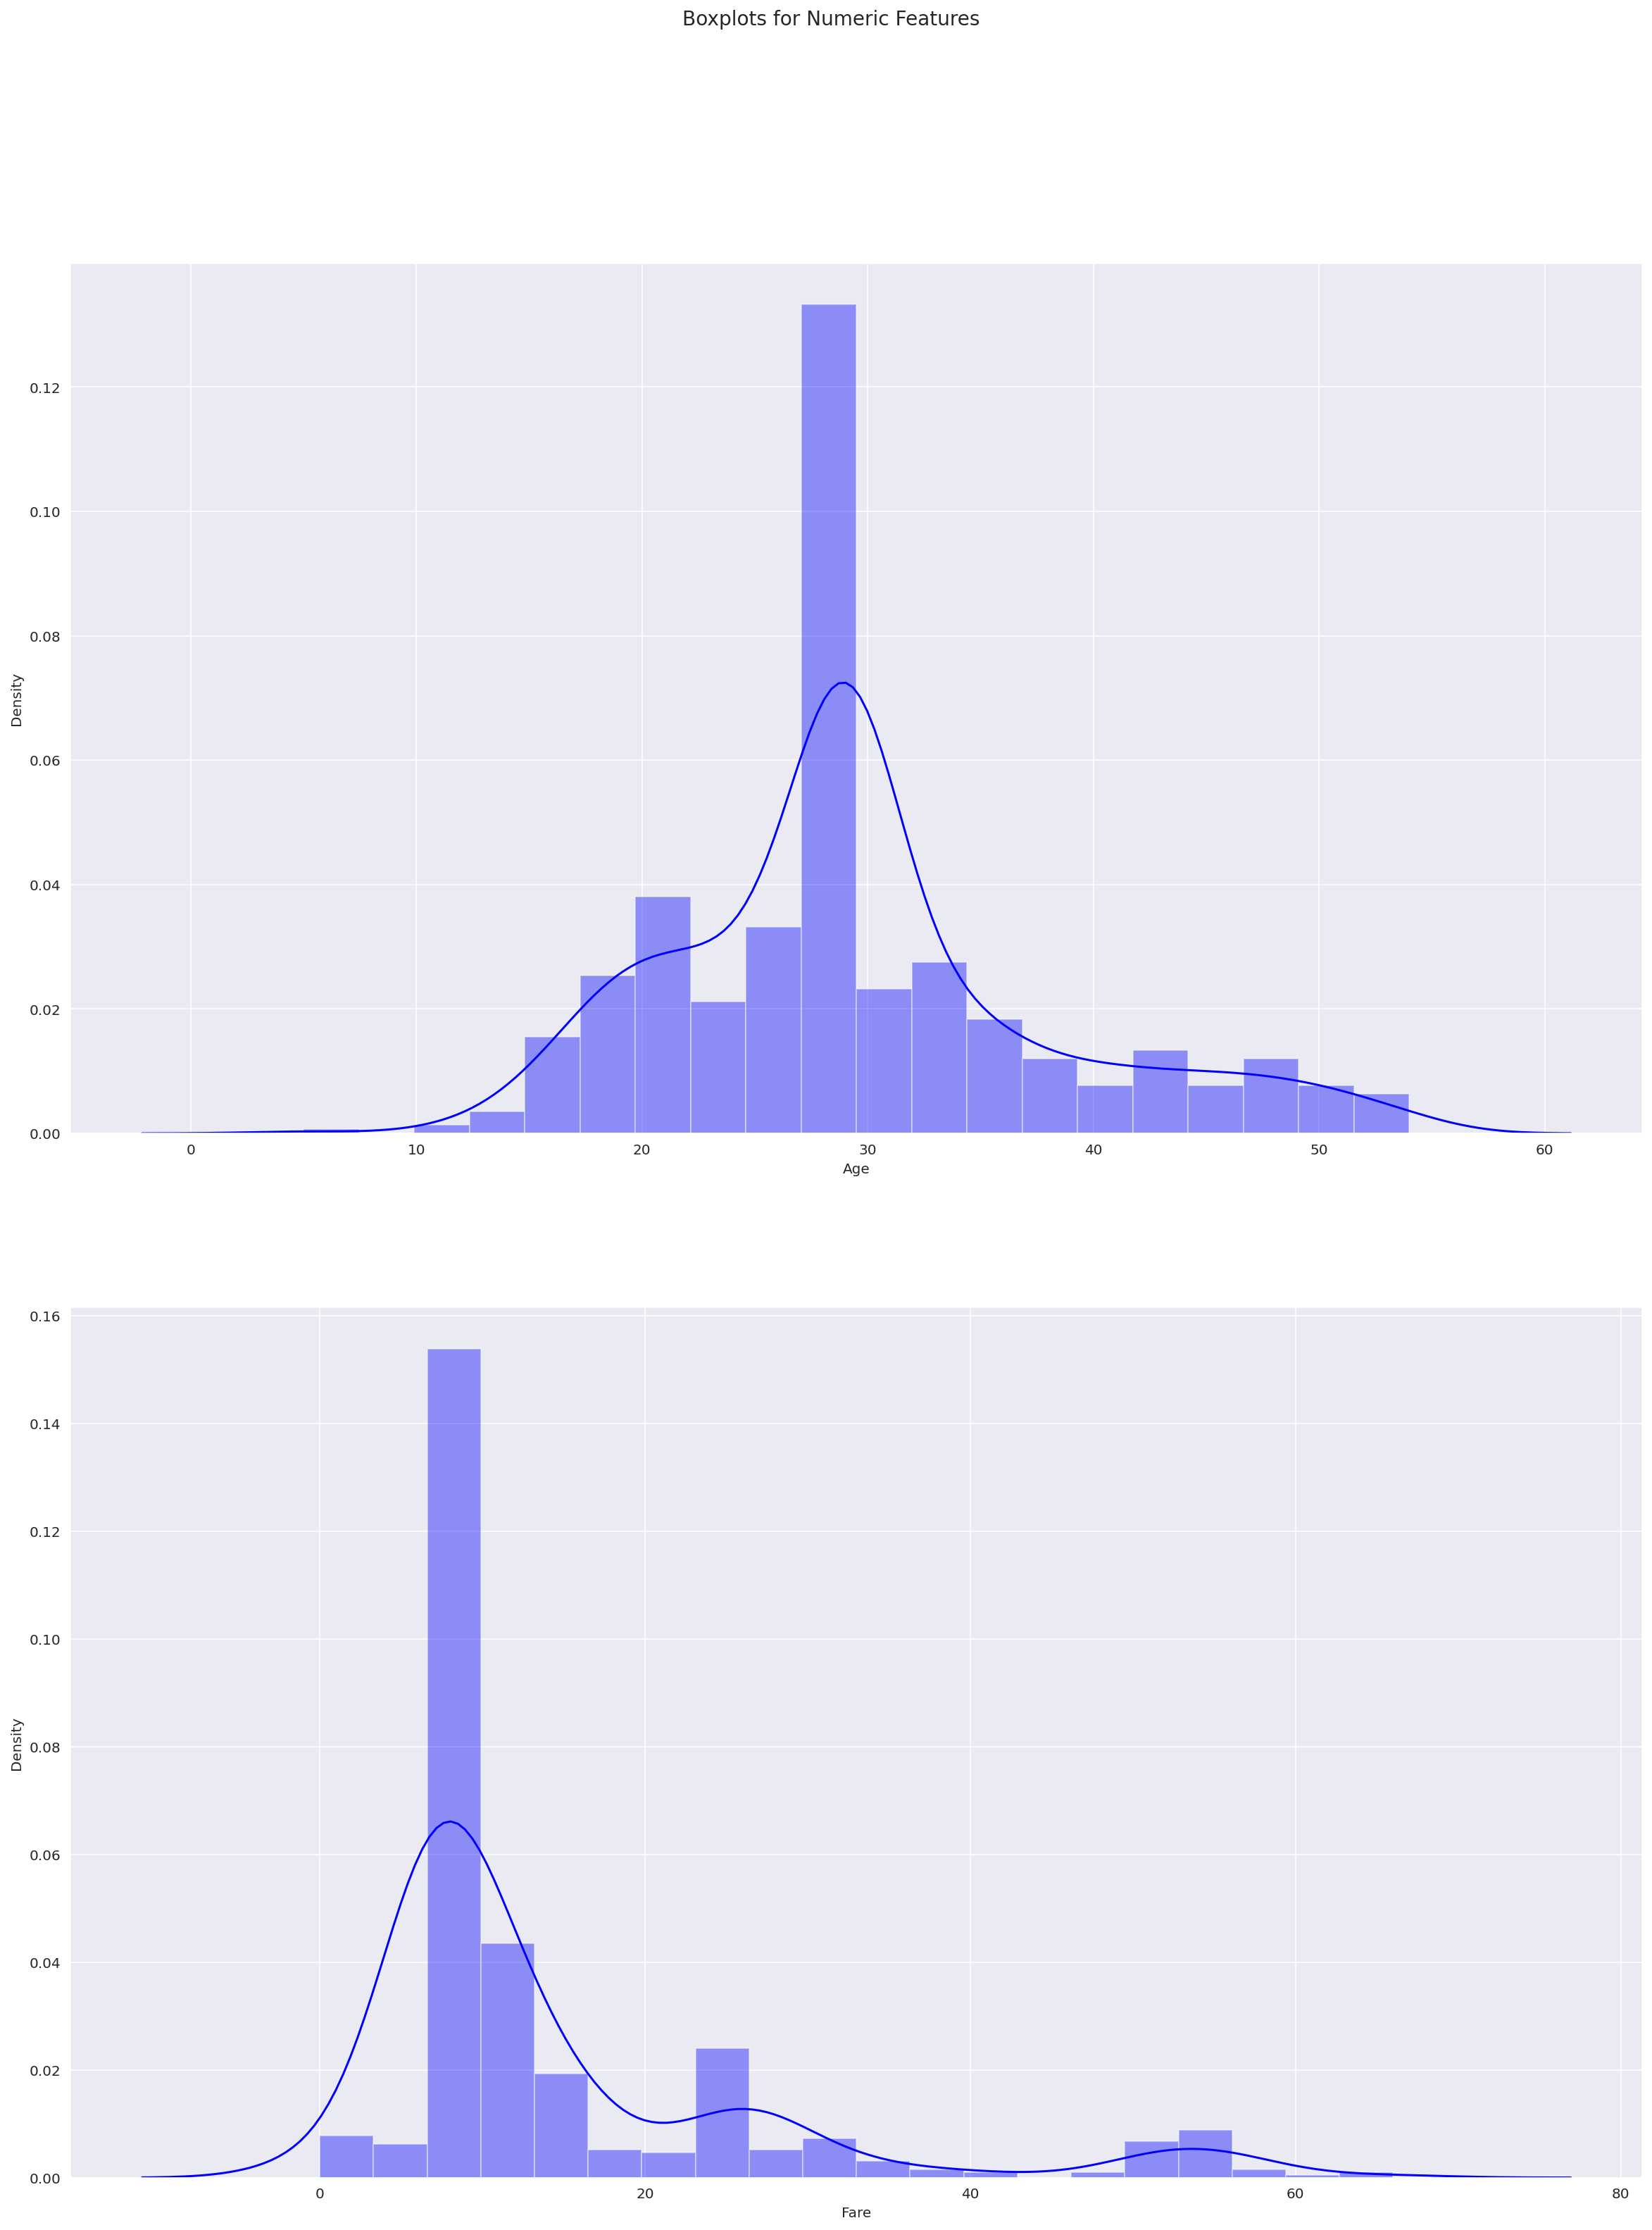

In [ ]:
# plot histograms for all numeric columns
# save the column names onto a dictionary
columns_dict = {'Age':1,'Fare' :2}
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 25))
for ax, name, data in zip(axes.flatten(), numeric, columns_dict):
  sns.distplot(df[name], hist = True, ax = ax, bins = 20, color = 'blue')
  plt.suptitle('Boxplots for Numeric Features', fontsize = 14)
  plt.subplots_adjust()

**Observation**


*   Feature Age is normally distributed.
*   The Fare column is skewed to the right indicating that most of its values lies in the upper range



**b. Bivariate Analysis**

In [ ]:
##Relationship between Survived and Sex
#---
#
table_sex = pd.crosstab(df['Survived'], df['Sex'])
table_sex

## Sex: 1 implies male and 0 female.
#---
#

##Survived:1 represents yes and 0 no

Sex,0,1
Survived,,
0,40,365
1,104,70


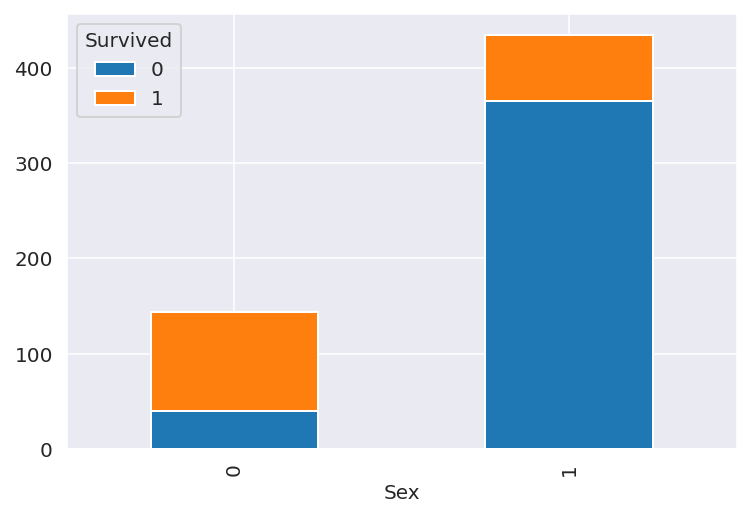

In [ ]:
##ploting : survived versus sex
#---
#
df.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', stacked=True)

**Observation**


*   Sex: 1 implies male and 0 female.

*   Survived:1 represents survivor and 0 perished



Despite the large number of men who were onboard,more women survived as compared to men.

Further investigation will be carried out to justify this.

In [ ]:
##Survived versus number of Siblings/Spouses Aboard
#---
#
table_SibSp = pd.crosstab(df['Survived'], df['SibSp'])
table_SibSp

SibSp,0,1,2
Survived,,,
0,343,54,8
1,130,41,3


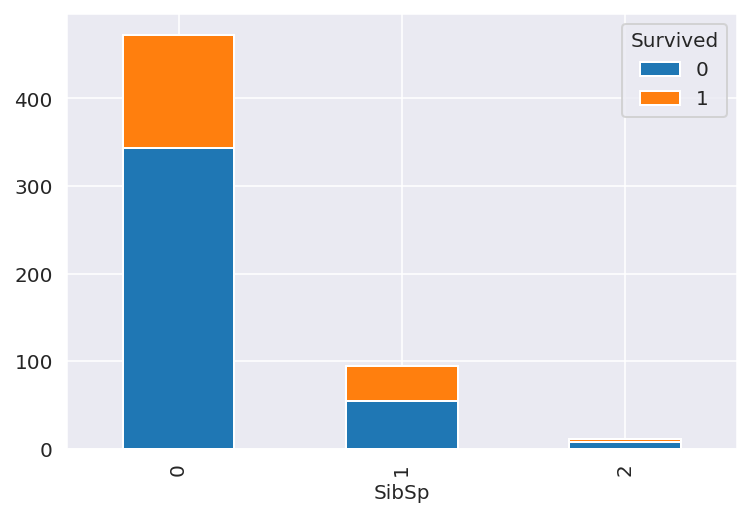

In [ ]:
##ploting : survived versus Sibsp
#---
#
df.groupby(['SibSp', 'Survived']).size().unstack().plot(kind='bar', stacked=True)

In [ ]:
##survived versus Age 
#---
#
table_Age = pd.crosstab(df['Survived'], df['Age'])
table_Age

Age,5,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
Survived,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0,2,0,7,6,12,14,13,15,15,10,13,15,10,6,17,118,16,7,8,8,9,7,8,4,5,6,6,2,6,2,4,6,2,8,2,1,4,4,2,0,4
1,1,0,1,1,2,3,3,3,3,7,2,3,6,2,5,3,5,8,7,47,6,4,9,1,4,5,6,0,0,2,3,0,5,0,2,3,0,0,4,2,2,1,1,1,1


In [ ]:
##survived versus Pclass 
#---
#
table_Pclass = pd.crosstab(df['Survived'], df['Pclass'])
table_Pclass

Pclass,1,2,3
Survived,,,
0,40,76,289
1,45,45,84


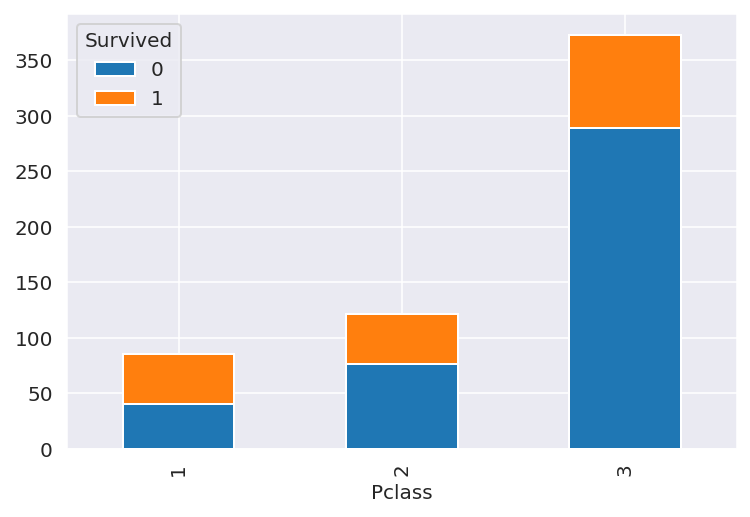

In [ ]:
##ploting : survived versus Pclass
#---
#
df.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar', stacked=True)

**Observation**



*  Pclass: 1 implies first class, 2 implies second class and 3 stands for third class.

*  Survived: 1 refers to survivor and 0 is perished


More people survived in the third class. Because third class accomodates more passengers, further investigation will be needed so as to acertain if this higher rate of survival could have been caused by the bias in the data or is it there by luck.


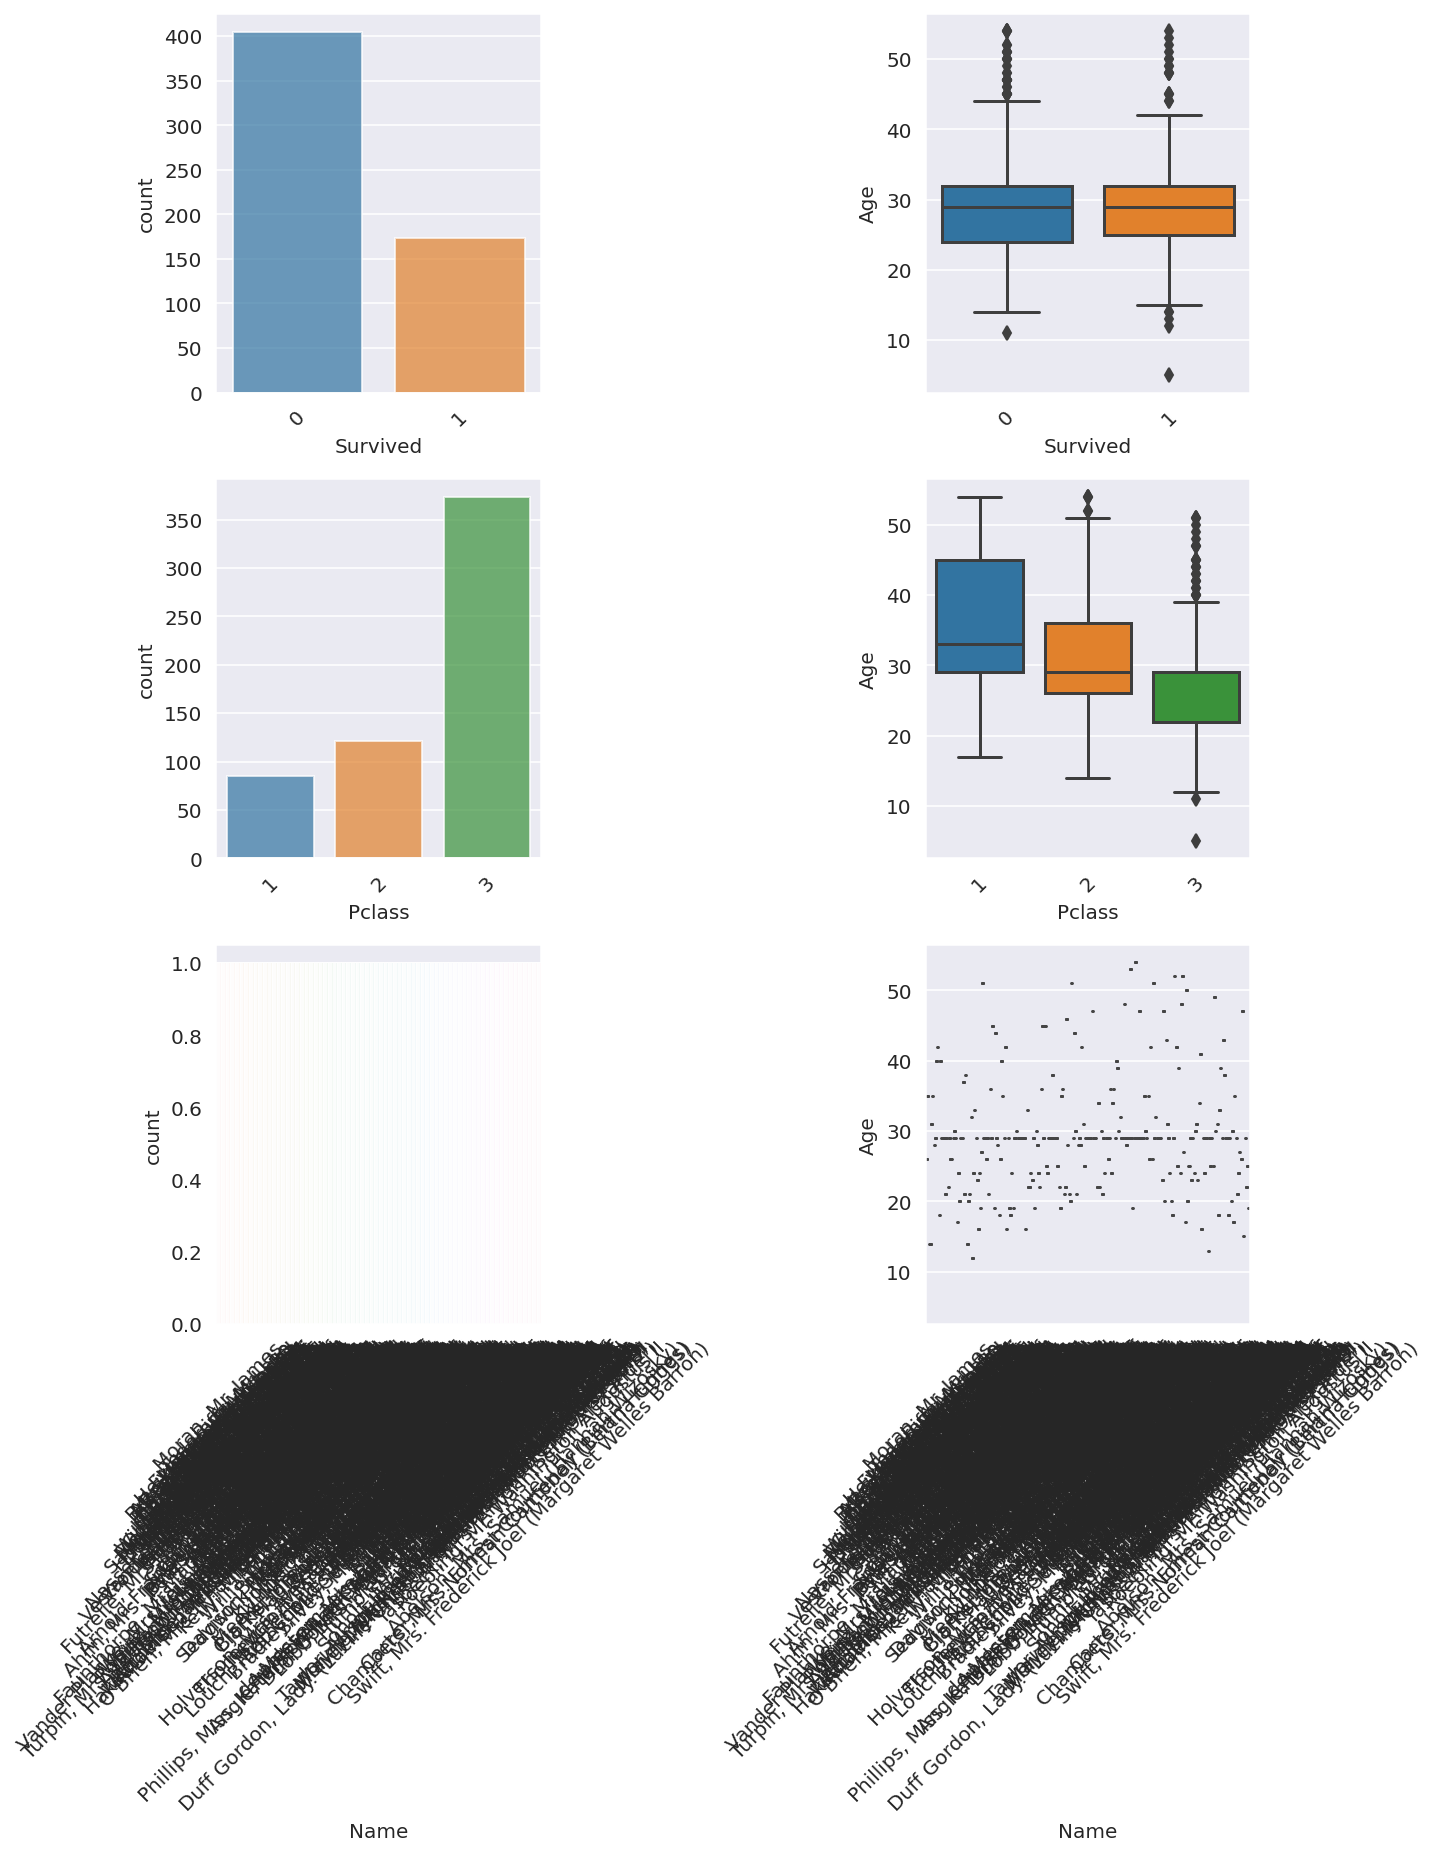

In [ ]:
#Categorical Feature Analysis
# Boxplot gives a good idea about how the Price is distributed across the categories.
# Distribution charts show how well each category is populated.
c = 0
len_c = 3
fig, axes = plt.subplots(len_c, 2, figsize=(10, 13))
for i, ax in enumerate(fig.axes):
    if (c < len_c) & (i % 2 == 0):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df.columns[c], alpha=0.7, data=df, ax=ax)

    if (c < len_c) & (i % 2 != 0):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(data = df, x=df.columns[c], y='Age', ax=ax)
        c = c + 1
fig.tight_layout()

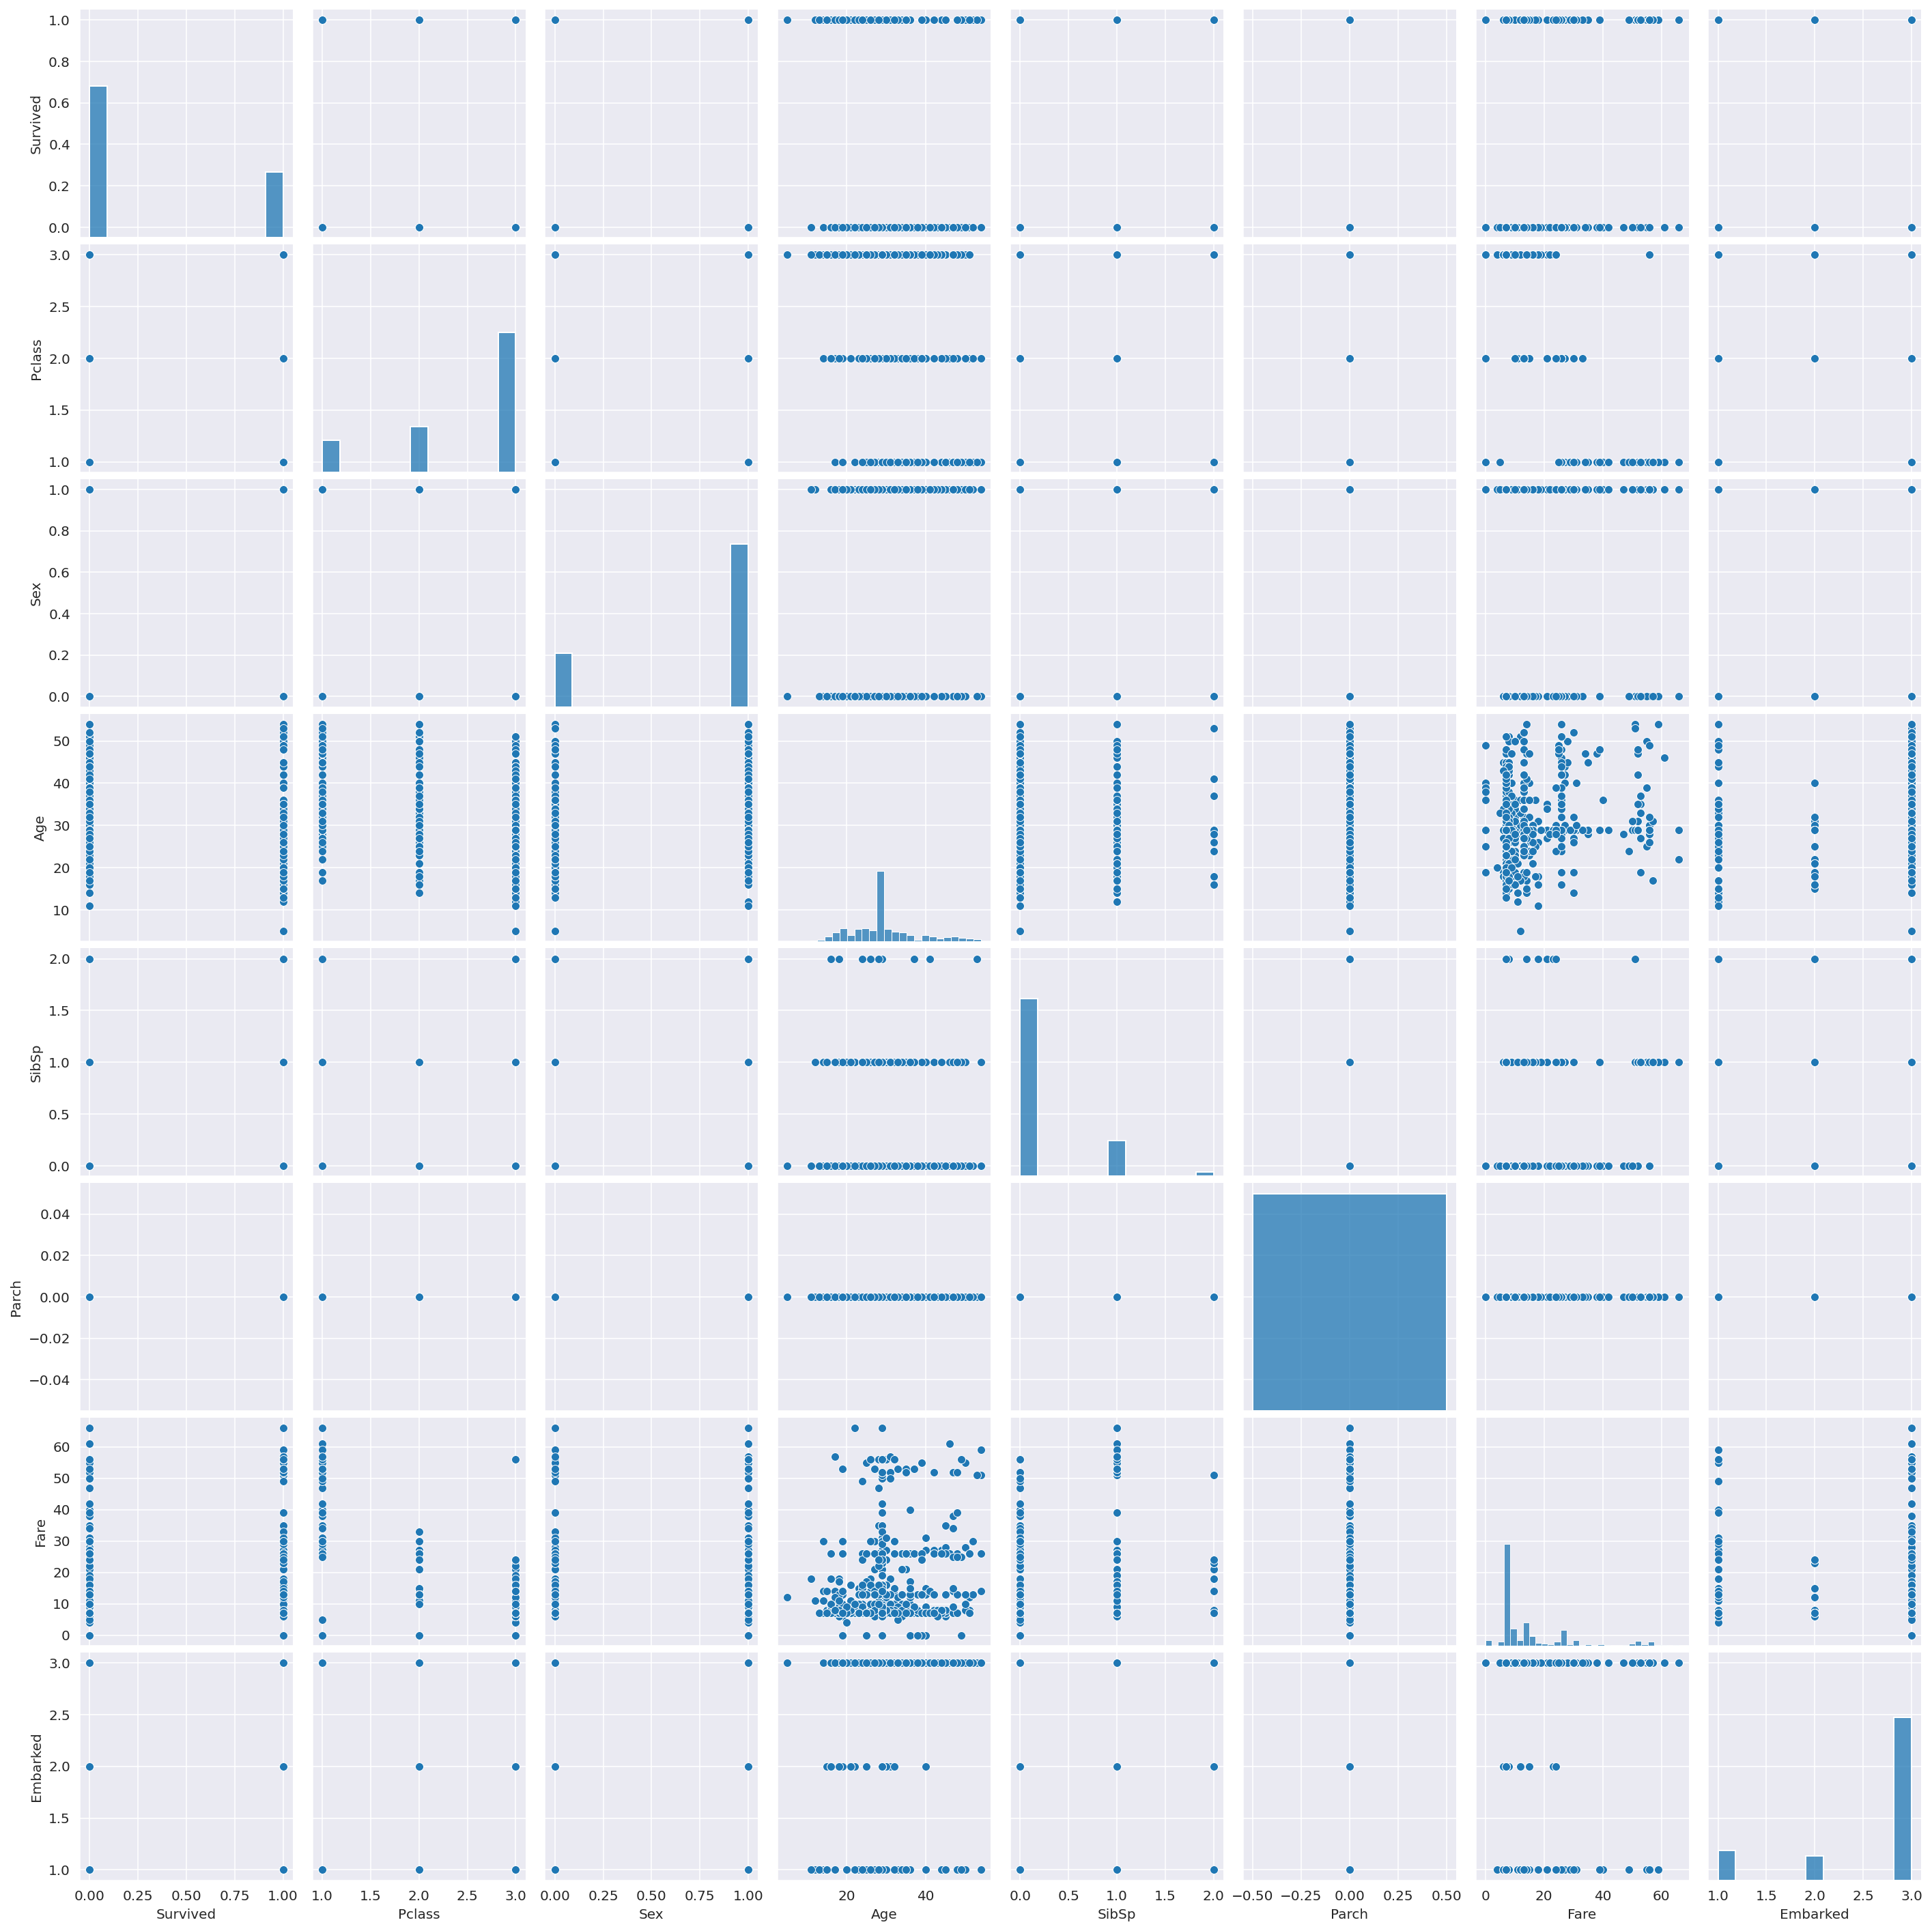

In [ ]:
##Ploting the bivariate summaries and recording our observations
# we use a pairplot to check for correlation between variables
#---
#
sns.pairplot(df, kind = 'scatter', dropna = False)
plt.show()

In [ ]:
##Tabulating the correlation coefficients
#---
#
corr = df.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000,-0.243,-0.529,0.006,0.100,nan,0.265,-0.124
Pclass,-0.243,1.000,0.041,-0.353,-0.090,nan,-0.680,-0.008
Sex,-0.529,0.041,1.000,0.081,-0.187,nan,-0.074,0.113
Age,0.006,-0.353,0.081,1.000,0.024,nan,0.251,0.071
SibSp,0.100,-0.090,-0.187,0.024,1.000,nan,0.360,-0.036
Parch,nan,nan,nan,nan,nan,nan,nan,nan
Fare,0.265,-0.680,-0.074,0.251,0.360,nan,1.000,-0.025
Embarked,-0.124,-0.008,0.113,0.071,-0.036,nan,-0.025,1.000


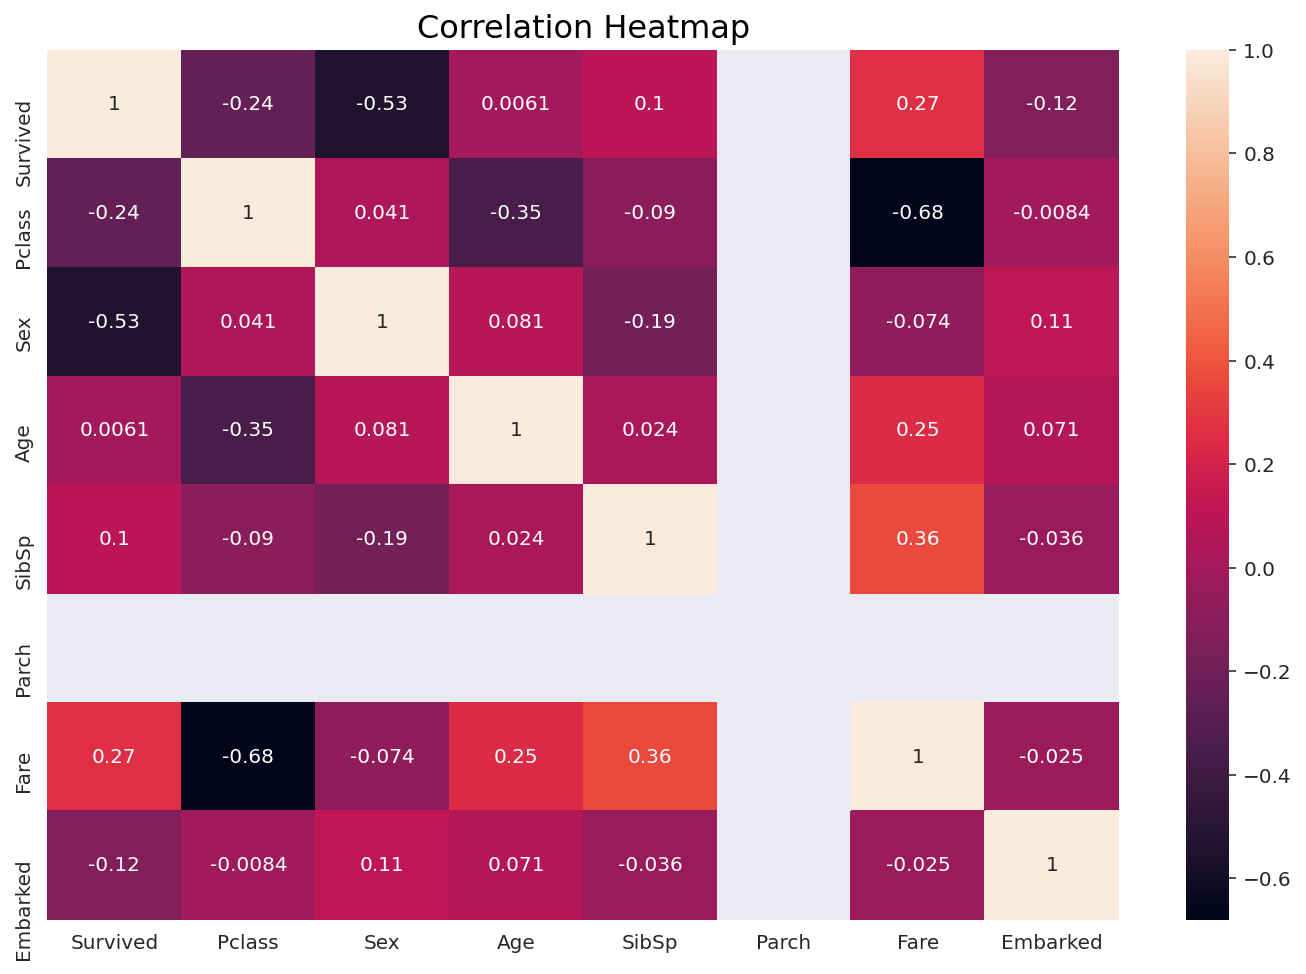

In [ ]:
#We create a heatmap to visualize the degree of correlation between variables

corr = df.corr()
fig, ax = plt.subplots(figsize = (12, 8))

sns.heatmap(corr,
          xticklabels = corr.columns.values,
          yticklabels = corr.columns.values,
          annot=True)
plt.title('Correlation Heatmap', color = 'black', fontsize = 16)
plt.show()

**Observation**


The correlation coefficient ranges from -0.6 to +1.

if the coefficients are close to +1, then that shows the strong positive correlation between variables. However, in this case, there are no cases of strong positive correlation between the variables. instead, they are positive and close to zero, and indication that the correlation is zero or something close to zero.

with the correlation coefficients going beyond the zero line to -0.689, it is said that the variables, in this case, fare and pclass are strongly negatively correlated.

#7.Implementing the solution

**a. Part A: 80:20 partition**

In [ ]:
##check the dataset datatypes 
#---
#
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex           int64
Age           int64
SibSp         int64
Parch         int64
Ticket       object
Fare          int64
Embarked    float64
dtype: object

In [ ]:
##Drop unnecessary columns
#---
#
df2 = df.drop(['Name', 'Ticket', 'Embarked'], axis=1)


In [ ]:
##Recheck the dataset datatypes
#---
#
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  579 non-null    int64
 1   Pclass    579 non-null    int64
 2   Sex       579 non-null    int64
 3   Age       579 non-null    int64
 4   SibSp     579 non-null    int64
 5   Parch     579 non-null    int64
 6   Fare      579 non-null    int64
dtypes: int64(7)
memory usage: 56.2 KB


In [ ]:
## Preview the first five records 
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22,1,0,7
2,1,3,0,26,0,0,7
3,1,1,0,35,1,0,53
4,0,3,1,35,0,0,8
5,0,3,1,29,0,0,8


In [ ]:
# Splitting our dataset into its attributes and labels
# ---
#
##The X variable contains the first seven columns of the dataset (i.e. attributes) while y contains the labels.
# ---
# 
X = df2.iloc[:, :7].values
y = df2.iloc[:, 0].values


In [ ]:
##Train Test Split
# ---
#
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
##preview the shape of train and test sets
#---
#
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(463, 7)
(463,)
(116, 7)
(116,)


In [ ]:
##Feature Scaling
# ---
#
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-0.65835897, -0.67637698,  0.59481188, ..., -0.44129845,
         0.        ,  0.01625008],
       [-0.65835897, -2.03795324,  0.59481188, ...,  1.93452927,
         0.        ,  2.90416809],
       [-0.65835897,  0.68519929,  0.59481188, ..., -0.44129845,
         0.        ,  0.09224792],
       ...,
       [-0.65835897, -2.03795324,  0.59481188, ...,  1.93452927,
         0.        ,  3.05616377],
       [-0.65835897,  0.68519929,  0.59481188, ..., -0.44129845,
         0.        ,  3.13216161],
       [ 1.51892819, -0.67637698, -1.68120382, ...,  1.93452927,
         0.        ,  0.85222634]])

In [ ]:
## Peforming LDA
#---
# 
##The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library can be used to Perform LDA in Python. 
#---
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

##In the script above the LinearDiscriminantAnalysis class is imported as LDA. 
# We have to pass the value for the n_components parameter of the LDA, 
# which refers to the number of linear discriminates that we want to retrieve. 
# In this case we set the n_components to 1, since we first want to check the performance 
# of our classifier with a single linear discriminant. 
# Finally we execute the fit and transform methods to actually retrieve the linear discriminants.
# Notice, in case of LDA, the transform method takes two parameters: the X_train and the y_train. 
# This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants

In [ ]:
##Training and Predictions
# ---
#
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

## predict based on the model we have trained
#---
#

comparison_frame=pd.DataFrame({'Actual': y_test.flatten(), 'predicted':y_pred.flatten()})
comparison_frame.sample(5)


,Actual,predicted
60,0,0
45,0,0
25,1,1
105,0,0
78,0,0


In [ ]:
##Evaluating the Algorithm
# ---
#
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix

##Print the Confusion Matrix with k =5 and slice it into four pieces
#---
#
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion matrix

 [[82  0]
 [ 0 34]]

True Positives(TP) =  82

True Negatives(TN) =  34

False Positives(FP) =  0

False Negatives(FN) =  0


In [ ]:
##Classification metrices
#---
#
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        34

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116



In [ ]:
##classification accuracies
#---
#
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
##printing the classification accuracy
#---
#

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 1.0000


In [ ]:
##printing the classification error
#---
#
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0000


In [ ]:
##printing the precision score
#---
#
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [ ]:
##specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 1.0000


In [ ]:
##false positive rate
#---
#
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0000


In [ ]:
## Checking the accuracy accuracy_score
# printing the accuracy of the training set
#---
#
from sklearn.metrics import accuracy_score
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

## The accuracy of this evaluation is 1

Accuracy1.0
Model accuracy score: 1.0000


In [ ]:
## Model Results
#---
#

## We create a DataFrame to store results
#---
#
dict={
    
    'Model':['K-Nearest Neighbors', 'Naive Bayes','Logistic Regression',
               'Decision Tree','Support Vector Machines'],
    'R2':[0,0,0,0,0],
    'Accuracy Score':[0,0,0,0,0],
    'F1 Score':[0,0,0,0,0],
    'Recall':[0,0,0,0,0],
    'Precision':[0,0,0,0,0],
    'RMSE':[0,0,0,0,0],
    'TP':[0,0,0,0,0],
    'TN':[0,0,0,0,0],
    'FP':[0,0,0,0,0],
    'FN':[0,0,0,0,0]
    }
df_results=pd.DataFrame(dict,columns=['Model','R2','Accuracy_Score','Recall','Precision','RMSE','TP','TN','FP','FN'])

In [ ]:

def model_results(model_type,y_test_data,y_prediction_data):
  index_val=df_results[df_results['Model']==model_type].index

## Assigning scores to a dataframe 
  df_results.loc[index_val,'F1 Score']=f1_score(y_test_data,y_prediction_data, average='weighted')
  df_results.loc[index_val,'Accuracy Score']=accuracy_score(y_test_data, y_prediction_data)
  df_results.loc[index_val,'Recall']=recall_score(y_test_data, y_prediction_data, average='weighted')
  df_results.loc[index_val,'Precission']=f1_score(y_test_data, y_prediction_data, average='weighted')
  df_results.loc[index_val,'RMSE']=np.sqrt(mean_squared_error(np.array(y_test_data), y_prediction_data))
  df_results.loc[index_val,'R2']=r2_score(y_test_data, y_prediction_data)
  tn,fp, fn,tp=confusion_matrix(y_test_data, y_prediction_data).ravel()
  df_results.loc[index_val, 'TP']=tp
  df_results.loc[index_val, 'TN']=tn
  df_results.loc[index_val, 'FP']=fp
  df_results.loc[index_val, 'FN']=fn

  return(df_results)


model_results('K-Nearest Neighbors' , y_test, y_pred)



,Model,R2,Accuracy_Score,Recall,Precision,RMSE,TP,TN,FP,FN,F1 Score,Accuracy Score,Precission
0,K-Nearest Neighbors,1.000,NaN,1.000,0,0.000,34,82,0,0,1.000,1.000,1.000
1,Naive Bayes,0.000,NaN,0.000,0,0.000,0,0,0,0,nan,nan,nan
2,Logistic Regression,0.000,NaN,0.000,0,0.000,0,0,0,0,nan,nan,nan
3,Decision Tree,0.000,NaN,0.000,0,0.000,0,0,0,0,nan,nan,nan
4,Support Vector Machines,0.000,NaN,0.000,0,0.000,0,0,0,0,nan,nan,nan


**Observation**

Since the data is imbalanced as we have more negative than positive, F1 Score is the best measure for part one. The F1 Score is 100% . This accuracy level is a point of interest as it could imply overfitting. This requires checking of confusion matrix .

From confusion matrix , True Positive are 34. True Negative are 82. False negative is 0. False positive is 0. Hence no test records were misclassified.

Therefore we proceed with further investigation so as to justify our result.


**b. Part B: 70:30 Partition**

In [ ]:
# Splitting our dataset into its attributes and labels
# ---
#
##The X variable contains the first seven columns of the dataset (i.e. attributes) while y contains the labels.
# ---
# 
X = df2.iloc[:, :7].values
y = df2.iloc[:, 0].values

In [ ]:
##Train Test Split
# ---
#
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
##preview the shape of train and test sets
#---
#
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(405, 7)
(405,)
(174, 7)
(174,)


In [ ]:
##Feature Scaling
# ---
#
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-0.6681531 , -2.12712458,  0.6144518 , ..., -0.45927933,
         0.        ,  1.64933348],
       [-0.6681531 , -2.12712458,  0.6144518 , ..., -0.45927933,
         0.        , -1.14489409],
       [-0.6681531 , -0.72860923,  0.6144518 , ..., -0.45927933,
         0.        , -0.10703814],
       ...,
       [-0.6681531 ,  0.66990612,  0.6144518 , ..., -0.45927933,
         0.        , -0.58604858],
       [ 1.49666295,  0.66990612,  0.6144518 , ..., -0.45927933,
         0.        , -0.5062135 ],
       [ 1.49666295, -2.12712458,  0.6144518 , ..., -0.45927933,
         0.        ,  0.93081782]])

In [ ]:
## Peforming LDA
#---
# 
##The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library can be used to Perform LDA in Python. 
#---
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

##In the script above the LinearDiscriminantAnalysis class is imported as LDA. 
# We have to pass the value for the n_components parameter of the LDA, 
# which refers to the number of linear discriminates that we want to retrieve. 
# In this case we set the n_components to 1, since we first want to check the performance 
# of our classifier with a single linear discriminant. 
# Finally we execute the fit and transform methods to actually retrieve the linear discriminants.
# Notice, in case of LDA, the transform method takes two parameters: the X_train and the y_train. 
# This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants

In [ ]:
##Training and Predictions
# ---
#
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

## predict based on the model we have trained
#---
#

comparison_frame=pd.DataFrame({'Actual': y_test.flatten(), 'predicted':y_pred.flatten()})
comparison_frame.sample(5)

,Actual,predicted
28,1,1
153,0,0
36,0,0
63,1,1
88,1,1


In [ ]:
##Evaluating the Algorithm
# ---
#
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix

##Print the Confusion Matrix with k =5 and slice it into four pieces
#---
#
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[125   0]
 [  0  49]]

True Positives(TP) =  125

True Negatives(TN) =  49

False Positives(FP) =  0

False Negatives(FN) =  0


In [ ]:
##Classification metrices
#---
#
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00        49

    accuracy                           1.00       174
   macro avg       1.00      1.00      1.00       174
weighted avg       1.00      1.00      1.00       174



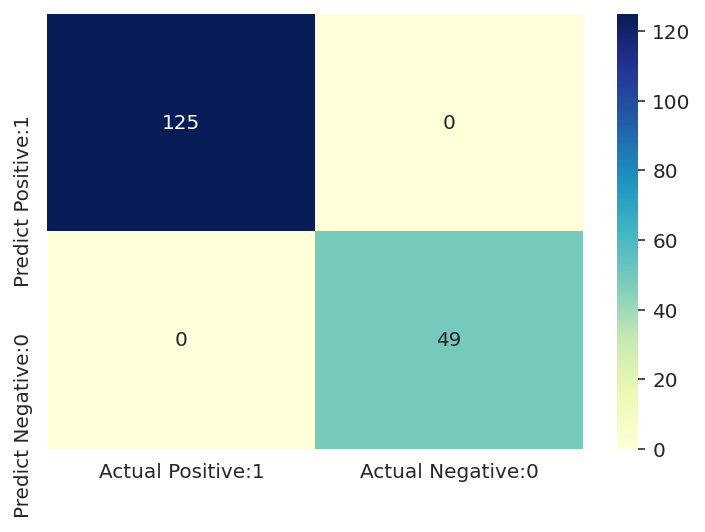

In [ ]:
##visualizing the confusion matrix with seaborn heatmap
#---
#
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
##classification accuracies
#---
#
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
##printing the classification accuracy
#---
#

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 1.0000


In [ ]:
##printing the classification error
#---
#
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0000


In [ ]:
##printing the precision score
#---
#
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [ ]:
##specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 1.0000


In [ ]:
##false positive rate
#---
#
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0000


In [ ]:
## Checking the  accuracy_score
# printing the accuracy of the training set
#---
#
from sklearn.metrics import accuracy_score
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

## The accuracy of this evaluation is 1

Accuracy1.0
Model accuracy score: 1.0000


In [ ]:
## Model Results
#---
#

## We create a DataFrame to store results
#---
#
dict={
    
    'Model':['K-Nearest Neighbors', 'Naive Bayes','Logistic Regression',
               'Decision Tree','Support Vector Machines'],
    'R2':[0,0,0,0,0],
    'Accuracy Score':[0,0,0,0,0],
    'F1 Score':[0,0,0,0,0],
    'Recall':[0,0,0,0,0],
    'Precision':[0,0,0,0,0],
    'RMSE':[0,0,0,0,0],
    'TP':[0,0,0,0,0],
    'TN':[0,0,0,0,0],
    'FP':[0,0,0,0,0],
    'FN':[0,0,0,0,0]
    }
df_results=pd.DataFrame(dict,columns=['Model','R2','Accuracy_Score','Recall','Precision','RMSE','TP','TN','FP','FN'])

In [ ]:

def model_results(model_type,y_test_data,y_prediction_data):
  index_val=df_results[df_results['Model']==model_type].index

## Assigning scores to a dataframe 
  df_results.loc[index_val,'F1 Score']=f1_score(y_test_data,y_prediction_data, average='weighted')
  df_results.loc[index_val,'Accuracy Score']=accuracy_score(y_test_data, y_prediction_data)
  df_results.loc[index_val,'Recall']=recall_score(y_test_data, y_prediction_data, average='weighted')
  df_results.loc[index_val,'Precission']=f1_score(y_test_data, y_prediction_data, average='weighted')
  df_results.loc[index_val,'RMSE']=np.sqrt(mean_squared_error(np.array(y_test_data), y_prediction_data))
  df_results.loc[index_val,'R2']=r2_score(y_test_data, y_prediction_data)
  tn,fp, fn,tp=confusion_matrix(y_test_data, y_prediction_data).ravel()
  df_results.loc[index_val, 'TP']=tp
  df_results.loc[index_val, 'TN']=tn
  df_results.loc[index_val, 'FP']=fp
  df_results.loc[index_val, 'FN']=fn

  return(df_results)


model_results('K-Nearest Neighbors' , y_test, y_pred)

,Model,R2,Accuracy_Score,Recall,Precision,RMSE,TP,TN,FP,FN,F1 Score,Accuracy Score,Precission
0,K-Nearest Neighbors,1.000,NaN,1.000,0,0.000,49,125,0,0,1.000,1.000,1.000
1,Naive Bayes,0.000,NaN,0.000,0,0.000,0,0,0,0,nan,nan,nan
2,Logistic Regression,0.000,NaN,0.000,0,0.000,0,0,0,0,nan,nan,nan
3,Decision Tree,0.000,NaN,0.000,0,0.000,0,0,0,0,nan,nan,nan
4,Support Vector Machines,0.000,NaN,0.000,0,0.000,0,0,0,0,nan,nan,nan


**Observation**

Since the data is imbalanced as we have more negative than positive, F1 Score is the best measure for part one. The F1 Score is 100% . This accuracy level is a point of interest as it could imply overfitting. This requires checking of confusion matrix .

From confusion matrix , True Positive are 49. True Negative are 125. False negative is 0. False positive is 0. Hence no test records were misclassified.

Therefore we proceed with further investigation so as to justify our result.


**c. Part C: 60:40 Partition**

In [ ]:
# Splitting our dataset into its attributes and labels
# ---
#
##The X variable contains the first seven columns of the dataset (i.e. attributes) while y contains the labels.
# ---
# 
X = df2.iloc[:, :7].values
y = df2.iloc[:, 0].values

In [ ]:
##Train Test Split
# ---
#
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [ ]:
##preview the shape of train and test sets
#---
#
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(347, 7)
(347,)
(232, 7)
(232,)


In [ ]:
##Feature Scaling
# ---
#
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[ 1.57162336, -0.75209466, -1.70260871, ..., -0.45610592,
         0.        ,  0.87918354],
       [-0.63628476,  0.658591  ,  0.58733401, ..., -0.45610592,
         0.        , -0.56021479],
       [-0.63628476,  0.658591  ,  0.58733401, ..., -0.45610592,
         0.        , -0.56021479],
       ...,
       [-0.63628476,  0.658591  ,  0.58733401, ..., -0.45610592,
         0.        , -0.56021479],
       [-0.63628476, -2.16278033,  0.58733401, ...,  1.80487626,
         0.        ,  3.53070679],
       [-0.63628476, -0.75209466,  0.58733401, ..., -0.45610592,
         0.        , -0.18142576]])

In [ ]:
## Peforming LDA
#---
# 
##The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library can be used to Perform LDA in Python. 
#---
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

##In the script above the LinearDiscriminantAnalysis class is imported as LDA. 
# We have to pass the value for the n_components parameter of the LDA, 
# which refers to the number of linear discriminates that we want to retrieve. 
# In this case we set the n_components to 1, since we first want to check the performance 
# of our classifier with a single linear discriminant. 
# Finally we execute the fit and transform methods to actually retrieve the linear discriminants.
# Notice, in case of LDA, the transform method takes two parameters: the X_train and the y_train. 
# This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants

In [ ]:
##Training and Predictions
# ---
#
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

## predict based on the model we have trained
#---
#

comparison_frame=pd.DataFrame({'Actual': y_test.flatten(), 'predicted':y_pred.flatten()})
comparison_frame.sample(5)

,Actual,predicted
168,1,1
77,0,0
174,1,1
148,0,0
92,0,0


In [ ]:
##Evaluating the Algorithm
# ---
#
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix

##Print the Confusion Matrix with k =5 and slice it into four pieces
#---
#
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[158   0]
 [  0  74]]

True Positives(TP) =  158

True Negatives(TN) =  74

False Positives(FP) =  0

False Negatives(FN) =  0


In [ ]:
##Classification metrices
#---
#
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00        74

    accuracy                           1.00       232
   macro avg       1.00      1.00      1.00       232
weighted avg       1.00      1.00      1.00       232



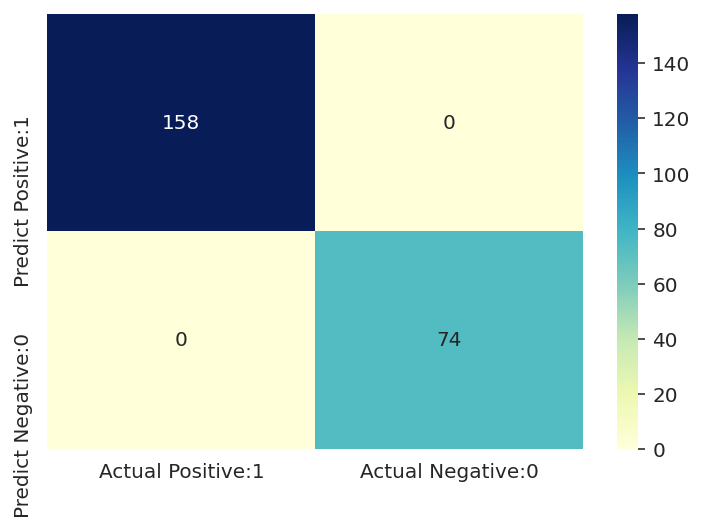

In [ ]:
##visualizing the confusion matrix with seaborn heatmap
#---
#
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
##classification accuracies
#---
#
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
##printing the classification accuracy
#---
#

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 1.0000


In [ ]:
##printing the classification error
#---
#
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0000


In [ ]:
##printing the precision score
#---
#
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [ ]:
##specificity
#---
#
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 1.0000


In [ ]:
##false positive rate
#---
#
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0000


In [ ]:
## Checking the accuracy accuracy_score
# printing the accuracy of the training set
#---
#
from sklearn.metrics import accuracy_score
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

## The accuracy of this evaluation is 1

Accuracy1.0
Model accuracy score: 1.0000


In [ ]:
## Model Results
#---
#

## We create a DataFrame to store results
#---
#
dict={
    
    'Model':['K-Nearest Neighbors', 'Naive Bayes','Logistic Regression',
               'Decision Tree','Support Vector Machines'],
    'R2':[0,0,0,0,0],
    'Accuracy Score':[0,0,0,0,0],
    'F1 Score':[0,0,0,0,0],
    'Recall':[0,0,0,0,0],
    'Precision':[0,0,0,0,0],
    'RMSE':[0,0,0,0,0],
    'TP':[0,0,0,0,0],
    'TN':[0,0,0,0,0],
    'FP':[0,0,0,0,0],
    'FN':[0,0,0,0,0]
    }
df_results=pd.DataFrame(dict,columns=['Model','R2','Accuracy_Score','Recall','Precision','RMSE','TP','TN','FP','FN'])

In [ ]:

def model_results(model_type,y_test_data,y_prediction_data):
  index_val=df_results[df_results['Model']==model_type].index

## Assigning scores to a dataframe 
  df_results.loc[index_val,'F1 Score']=f1_score(y_test_data,y_prediction_data, average='weighted')
  df_results.loc[index_val,'Accuracy Score']=accuracy_score(y_test_data, y_prediction_data)
  df_results.loc[index_val,'Recall']=recall_score(y_test_data, y_prediction_data, average='weighted')
  df_results.loc[index_val,'Precission']=f1_score(y_test_data, y_prediction_data, average='weighted')
  df_results.loc[index_val,'RMSE']=np.sqrt(mean_squared_error(np.array(y_test_data), y_prediction_data))
  df_results.loc[index_val,'R2']=r2_score(y_test_data, y_prediction_data)
  tn,fp, fn,tp=confusion_matrix(y_test_data, y_prediction_data).ravel()
  df_results.loc[index_val, 'TP']=tp
  df_results.loc[index_val, 'TN']=tn
  df_results.loc[index_val, 'FP']=fp
  df_results.loc[index_val, 'FN']=fn

  return(df_results)


model_results('K-Nearest Neighbors' , y_test, y_pred)

,Model,R2,Accuracy_Score,Recall,Precision,RMSE,TP,TN,FP,FN,F1 Score,Accuracy Score,Precission
0,K-Nearest Neighbors,1.000,NaN,1.000,0,0.000,74,158,0,0,1.000,1.000,1.000
1,Naive Bayes,0.000,NaN,0.000,0,0.000,0,0,0,0,nan,nan,nan
2,Logistic Regression,0.000,NaN,0.000,0,0.000,0,0,0,0,nan,nan,nan
3,Decision Tree,0.000,NaN,0.000,0,0.000,0,0,0,0,nan,nan,nan
4,Support Vector Machines,0.000,NaN,0.000,0,0.000,0,0,0,0,nan,nan,nan


**Observation**

Since the data is imbalanced as we have more negative than positive, F1 Score is the best measure for part one. The F1 Score is 100% . This accuracy level is a point of interest as it could imply overfitting. This requires checking of confusion matrix .

From confusion matrix , True Positive are 74. True Negative are 158. False negative is 0. False positive is 0. Hence no test records were misclassified.

Therefore we proceed with further investigation so as to justify our result.


#8.Challenging the solution

Based on the Predictive analysis further investigation and assessment is needed on the classification model i.e KNeighborsClassifier which would be provided to the British Passanger liner.

**9.Followup questions**


a). Did we have the right data?

b). Do we need other data to answer our question?

c). Did we have the right question?

d). Did we choose the right model?